In [7]:
import pandas as pd

### Cargamos las metricas y coeficientes de los modelos

In [8]:
lineal_coefs_df = pd.read_csv(
    '../../datamarts/coeficientes_por_categoria_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

nonlineal_importances_df = pd.read_csv(
    '../../datamarts/impotancia_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_lineal_df = pd.read_csv(
    '../../datamarts/metricas_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_nonlineal_df = pd.read_csv(
    '../../datamarts/r2_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

## Comparativa del modelo lineal y no lineal

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def comparar_coeficientes_e_importancias_con_r2(
    lineal_coefs_df,
    nonlineal_importances_df,
    metrics_lineal_df,
    metrics_nonlineal_df,
    top_n=10
):
    resultados = []

    # Recolectar todas las variables posibles
    todas_las_variables = sorted(
        set(lineal_coefs_df['Variable']) |
        set(nonlineal_importances_df['Variable'])
    )

    # Generar colores únicos por variable
    palette = sns.color_palette("tab20", 20) + sns.color_palette("Set3", len(todas_las_variables) - 20)
    color_dict = {var: palette[i] for i, var in enumerate(todas_las_variables)}

    # Asegurar índice
    if 'Variable' in lineal_coefs_df.columns:
        lineal_coefs_df = lineal_coefs_df.set_index('Variable')

    targets = nonlineal_importances_df['Target'].unique()

    for target in targets:
        if target not in lineal_coefs_df.columns:
            continue

        # Coeficientes
        coefs = lineal_coefs_df[target].dropna()
        top_coefs = coefs.abs().sort_values(ascending=False).head(top_n)
        top_coef_vars = top_coefs.index

        # Importancias
        imp_target = nonlineal_importances_df[nonlineal_importances_df['Target'] == target]
        top_importances = imp_target.sort_values(by='Importance', ascending=False).head(top_n)
        top_imp_vars = top_importances['Variable']

        # R²
        r2_lineal_val = metrics_lineal_df.loc[metrics_lineal_df['Gasto'] == target, 'R²']
        r2_lineal_str = f"{r2_lineal_val.values[0]:.3f}" if not r2_lineal_val.empty else "N/A"

        r2_nonlineal_val = metrics_nonlineal_df.loc[metrics_nonlineal_df['Target'] == target, 'R2']
        r2_nonlineal_str = f"{r2_nonlineal_val.values[0]:.3f}" if not r2_nonlineal_val.empty else "N/A"

        # Plot
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))

        axs[0].barh(
            top_coef_vars,
            top_coefs.values,
            color=[color_dict[v] for v in top_coef_vars]
        )
        axs[0].set_title(f'|Coef| - {target}\nR² lineal = {r2_lineal_str}')
        axs[0].invert_yaxis()
        axs[0].set_xlabel('Valor Absoluto del Coeficiente')

        axs[1].barh(
            top_imp_vars,
            top_importances['Importance'].values,
            color=[color_dict[v] for v in top_imp_vars]
        )
        axs[1].set_title(f'Importancia - {target}\nR² no lineal = {r2_nonlineal_str}')
        axs[1].invert_yaxis()
        axs[1].set_xlabel('Importancia del Modelo')

        plt.suptitle(f'Comparativa: Coeficientes vs Importancias - {target}', fontsize=14)
        plt.tight_layout()
        resultados.append(fig)

    return resultados


C:\Users\rauul\AppData\Local\Temp\ipykernel_26876\3714838517.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(15, 6))


[<Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 

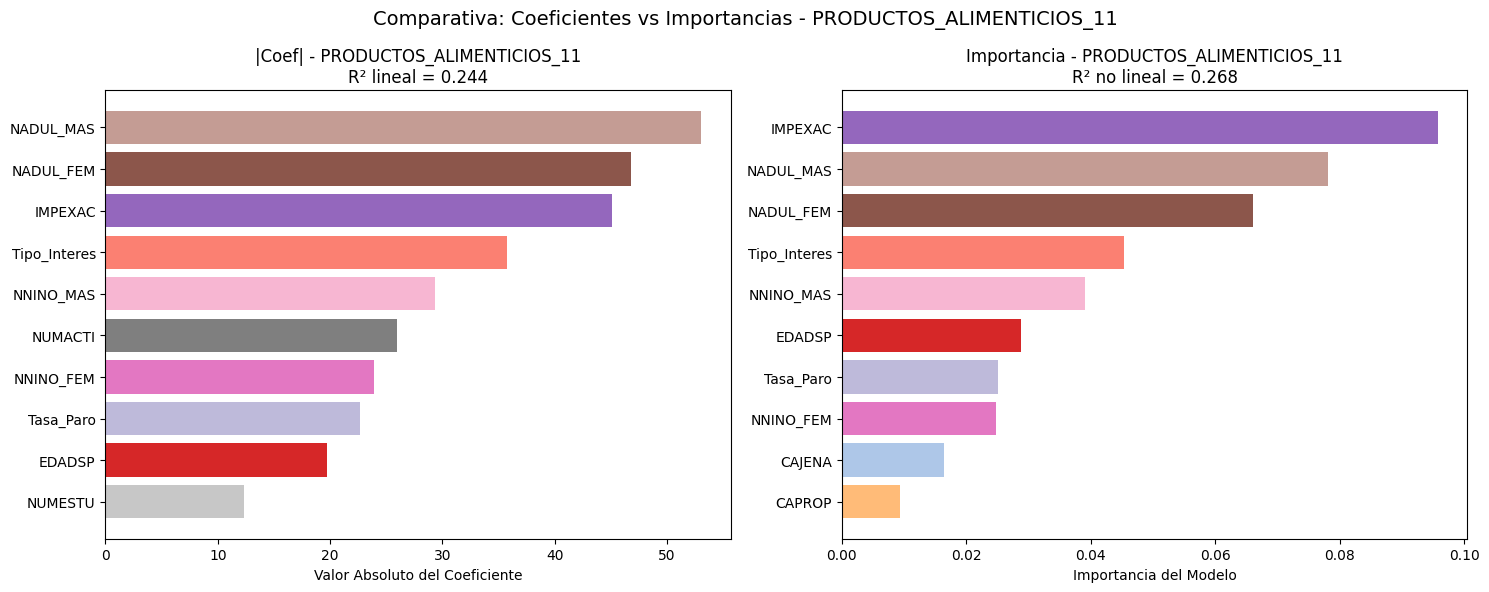

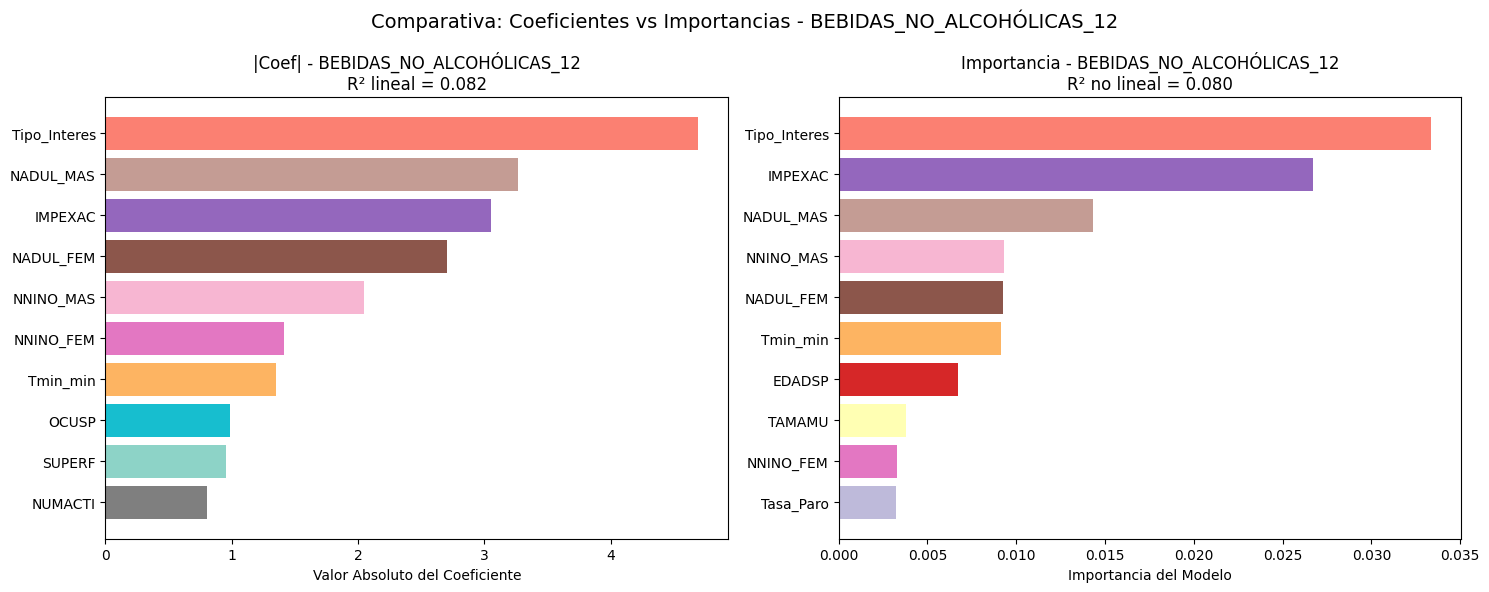

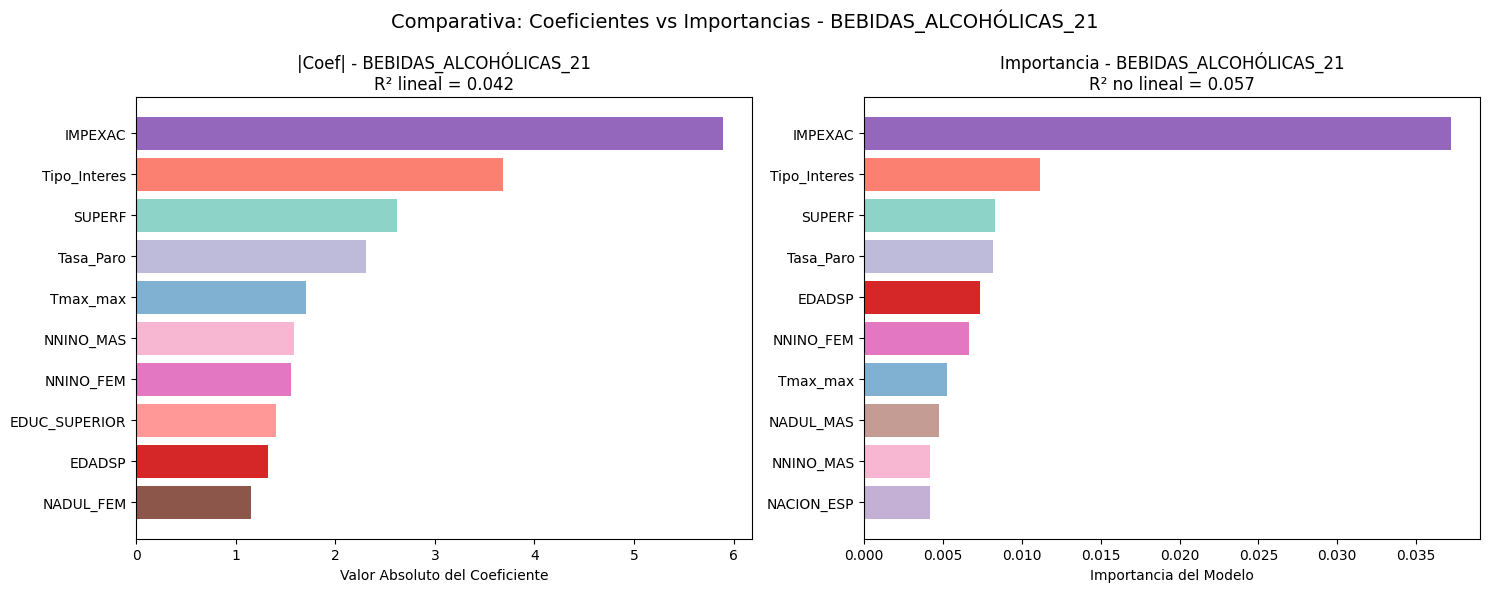

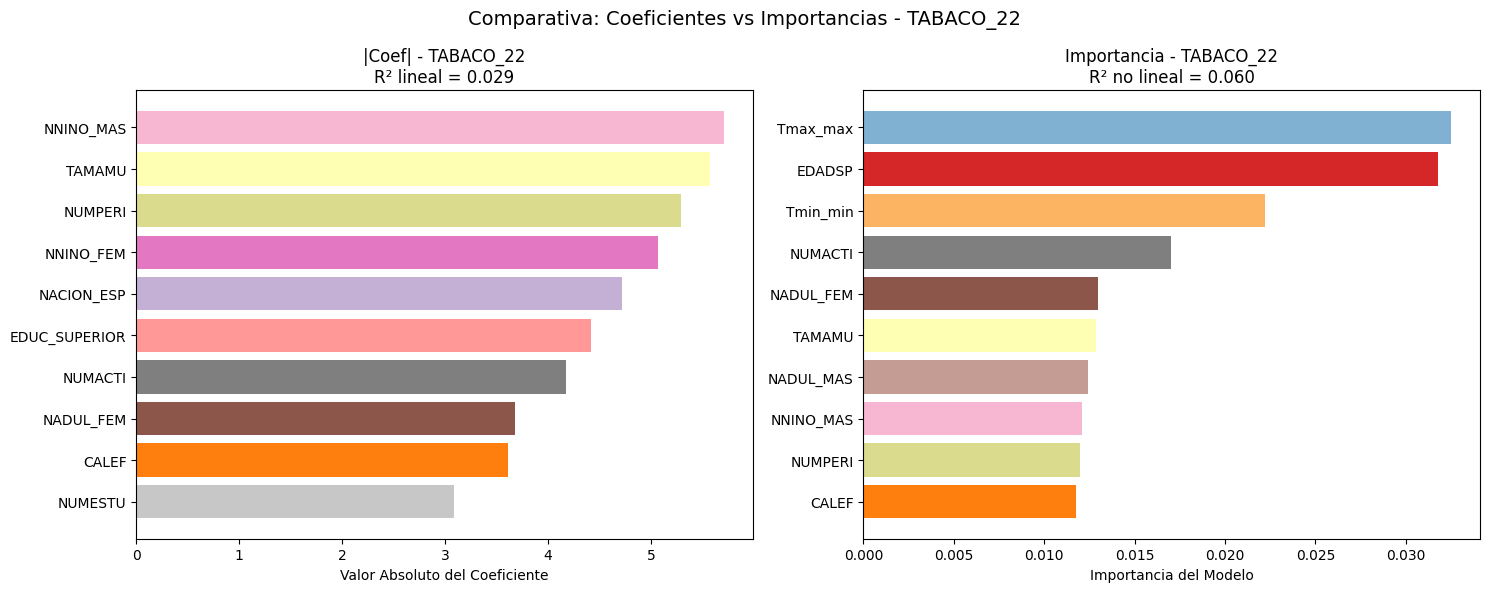

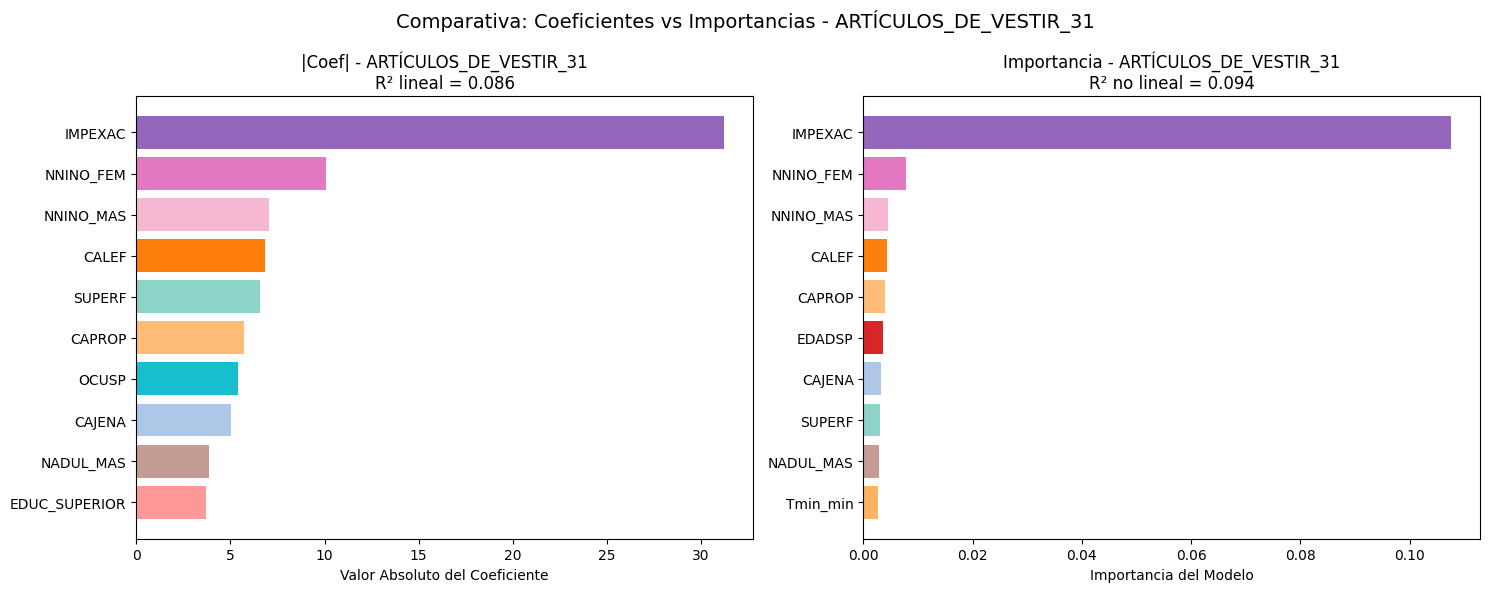

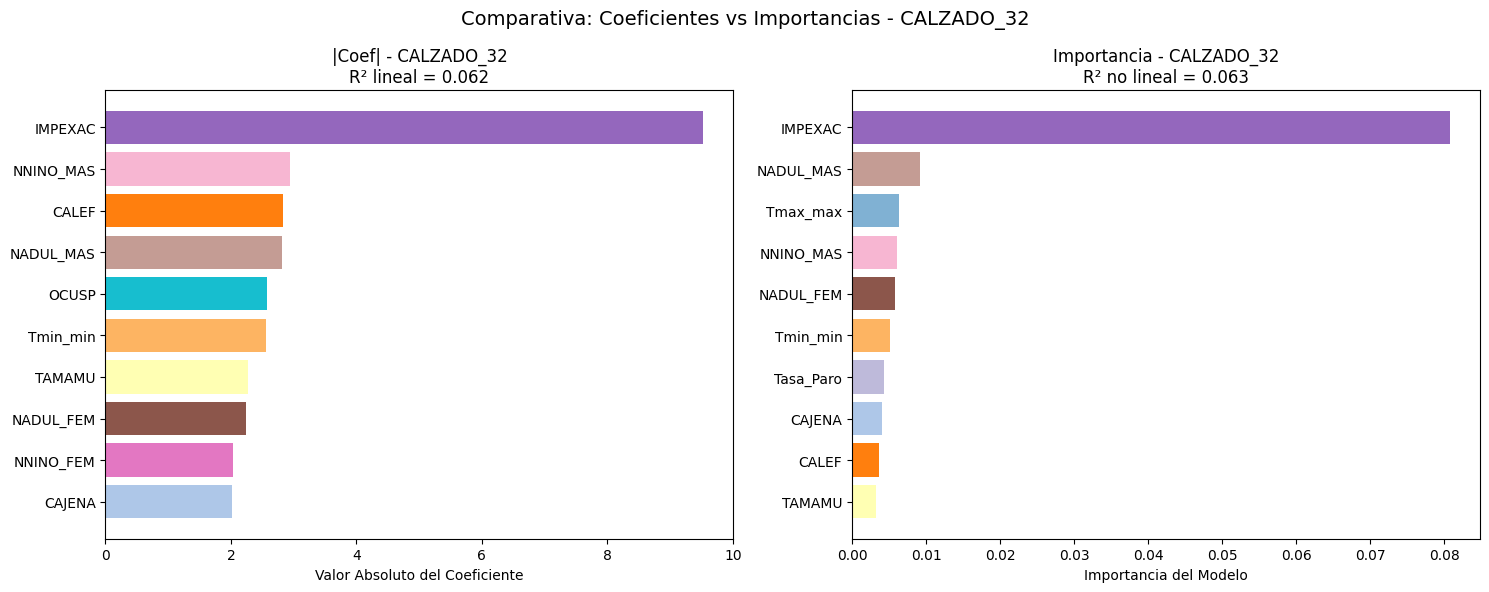

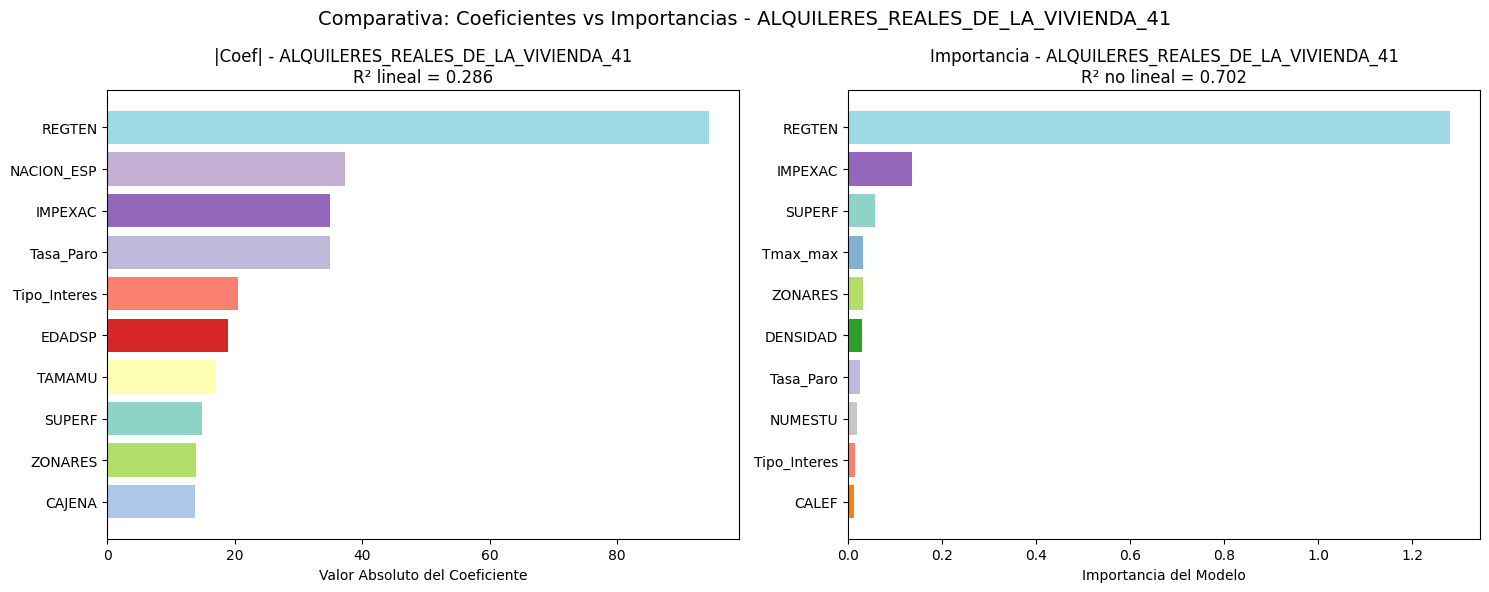

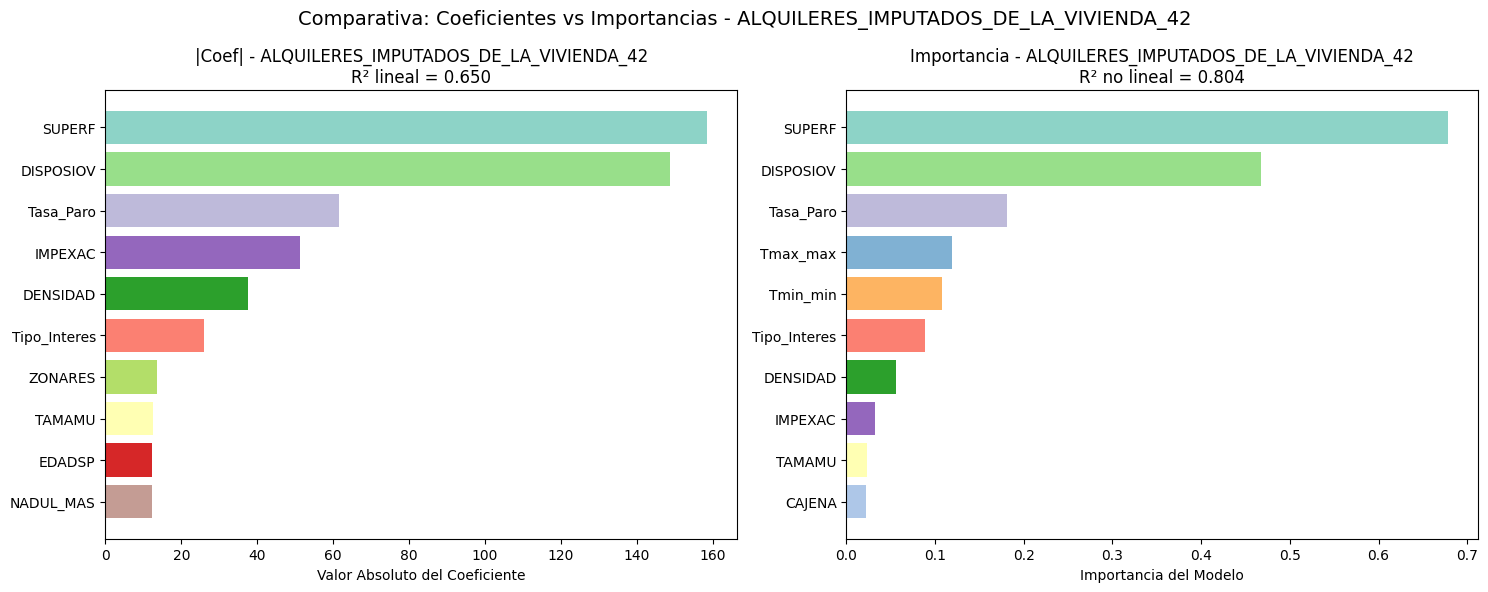

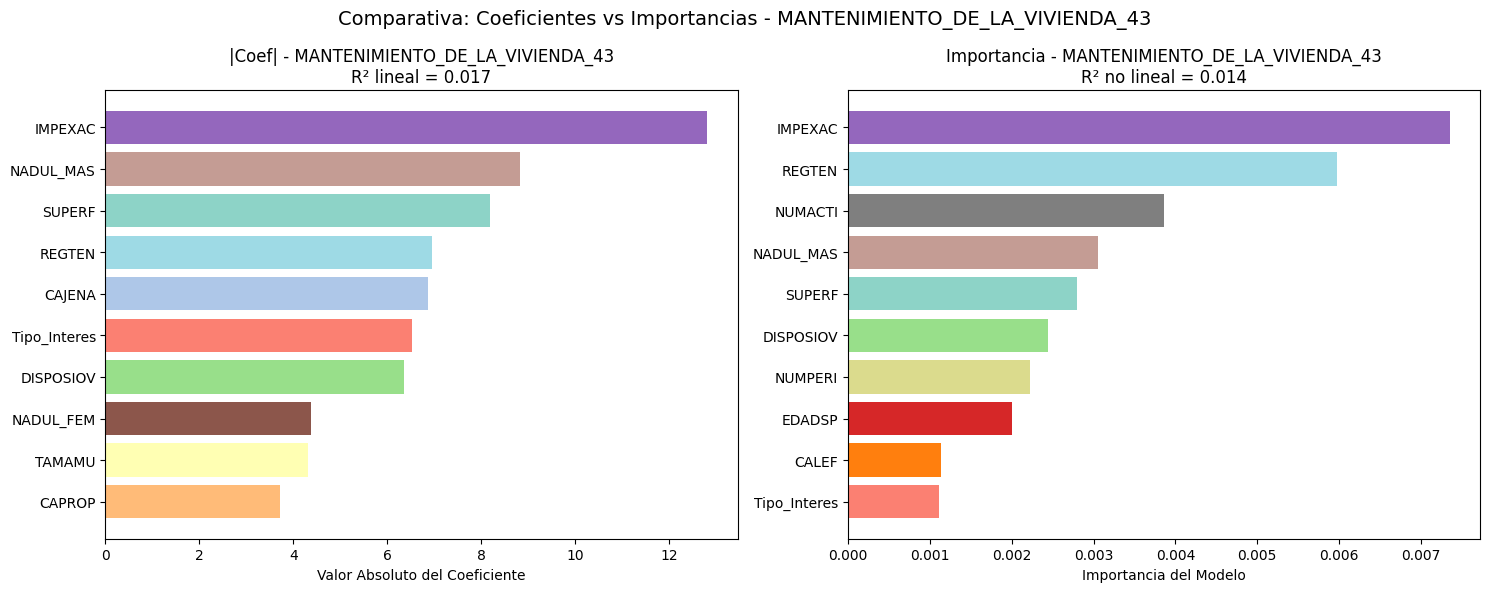

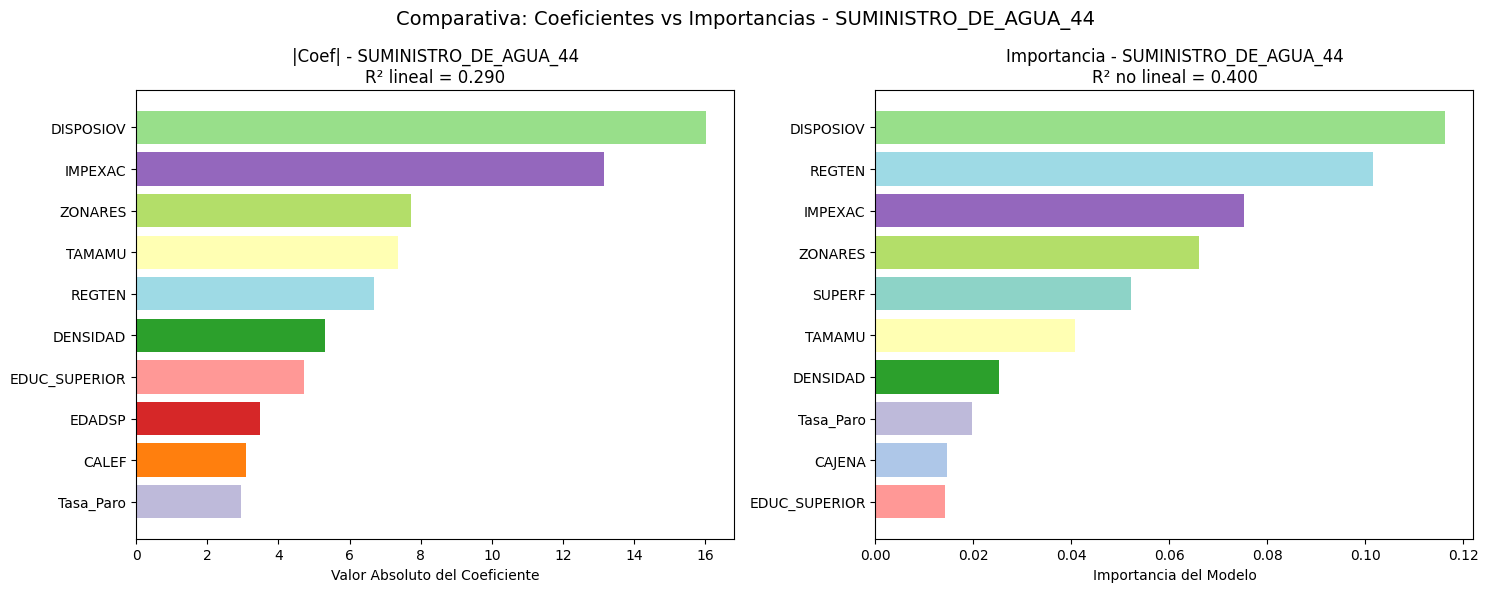

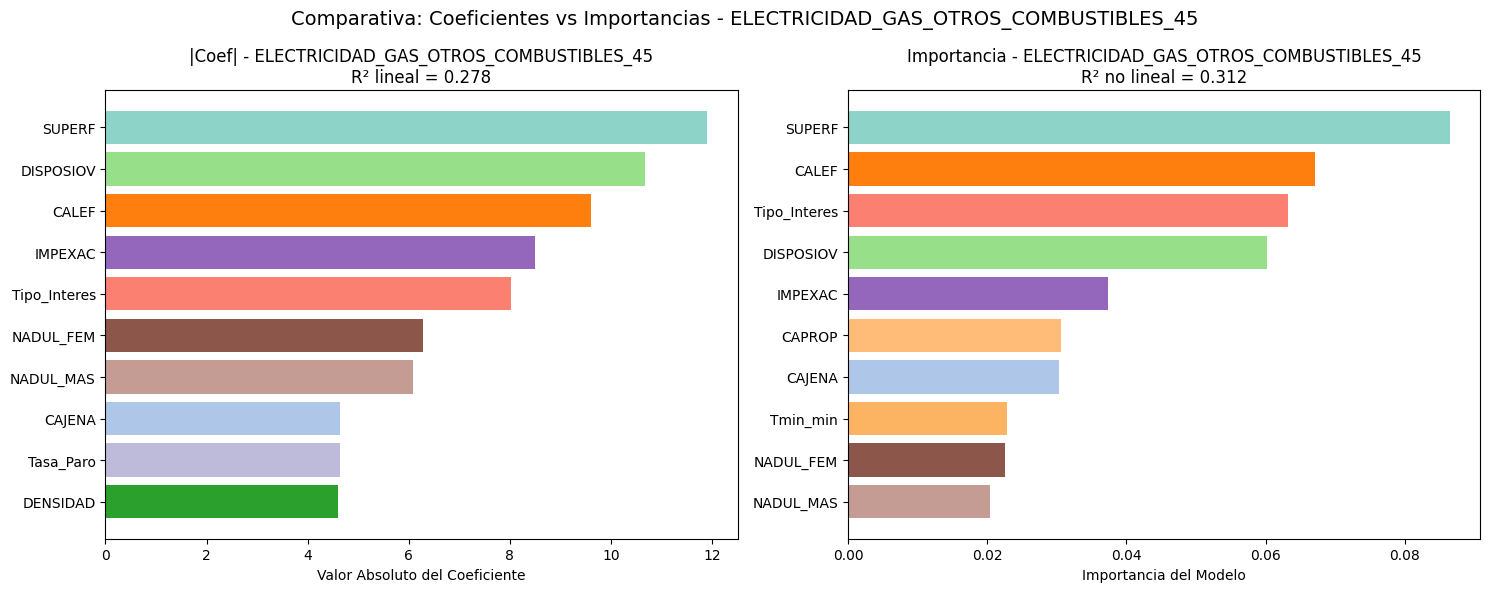

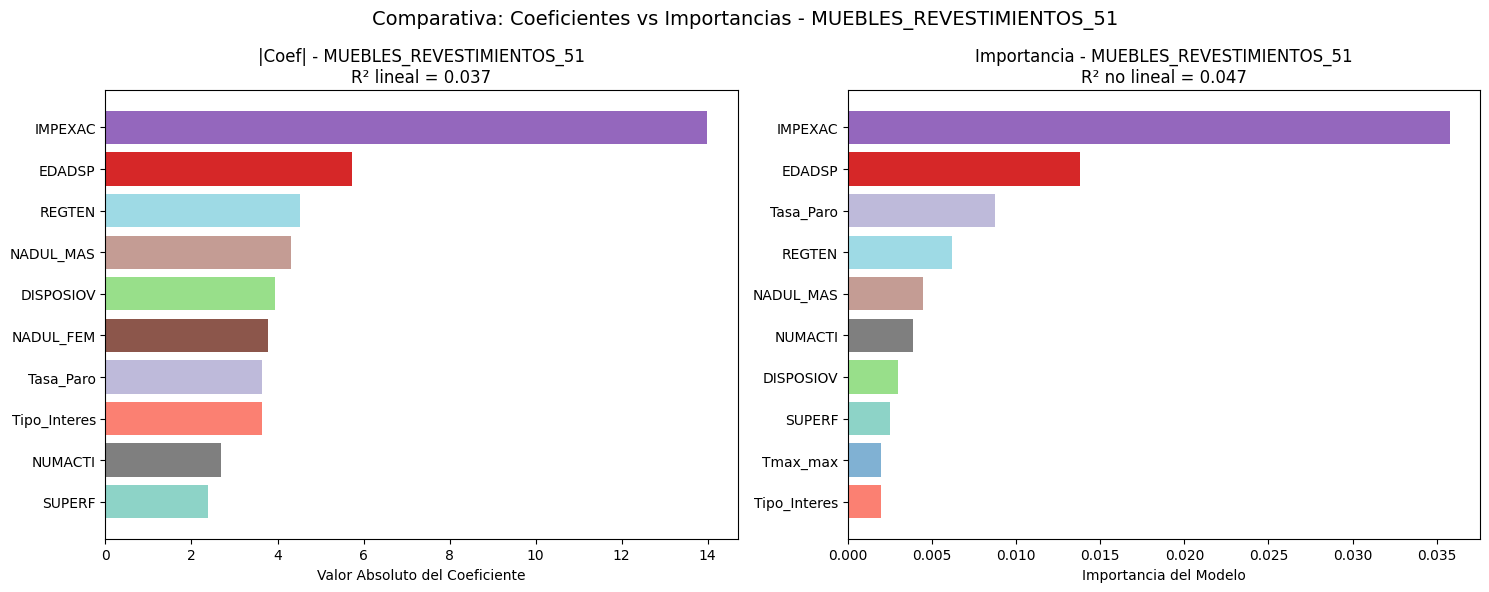

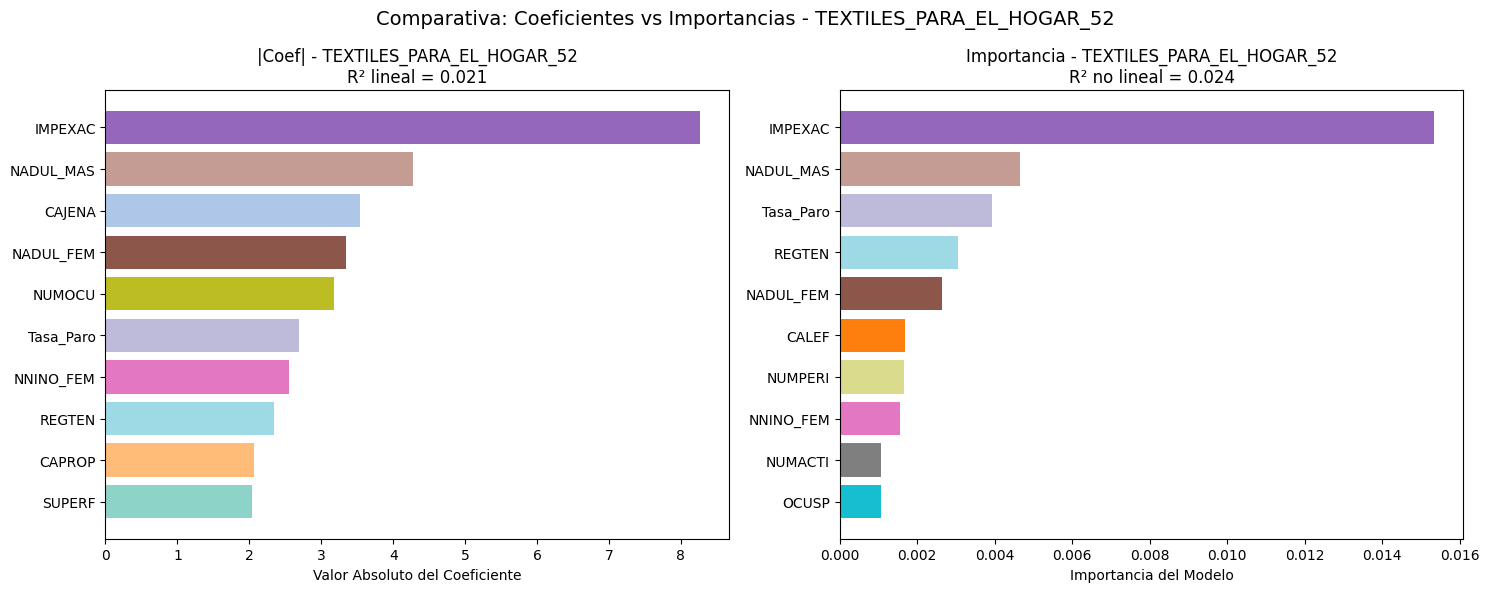

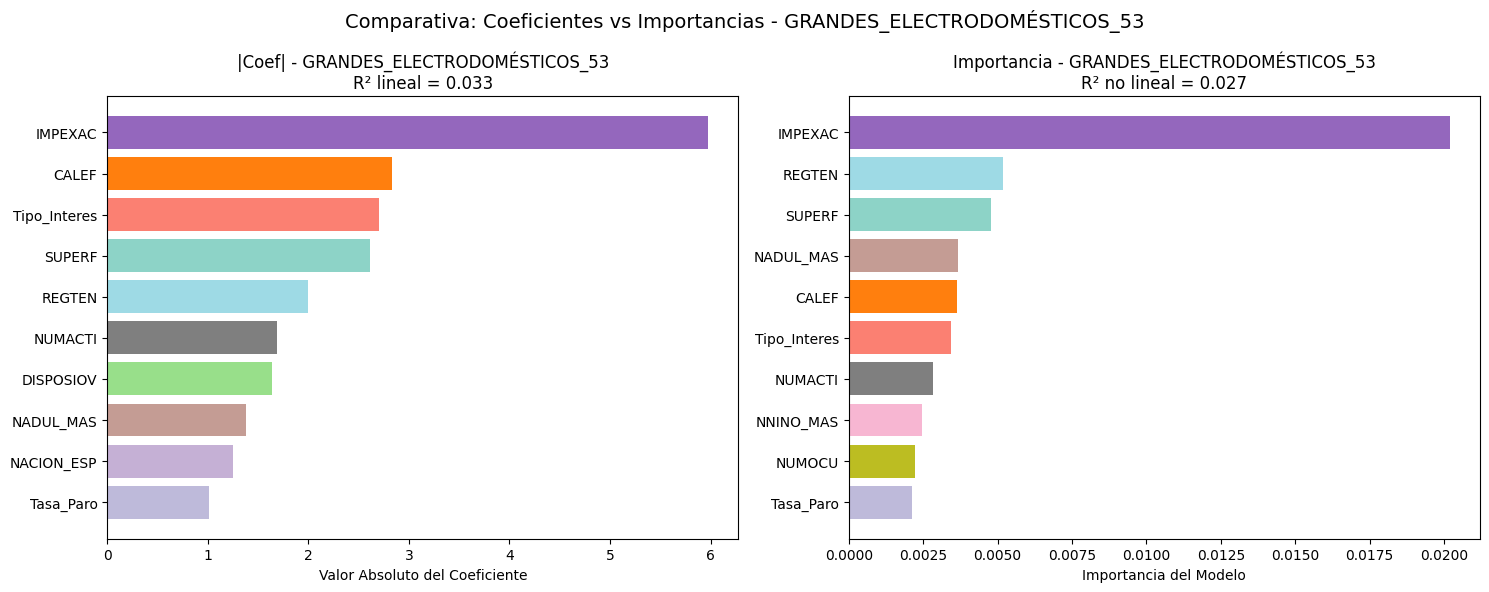

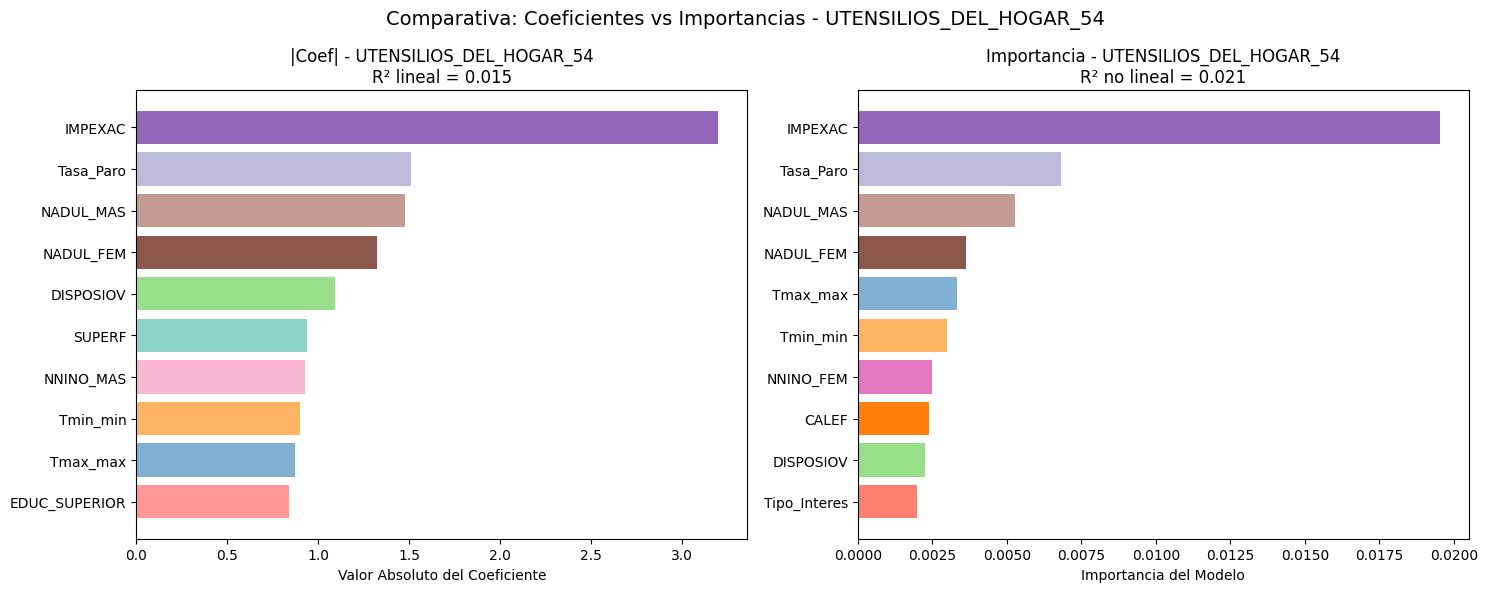

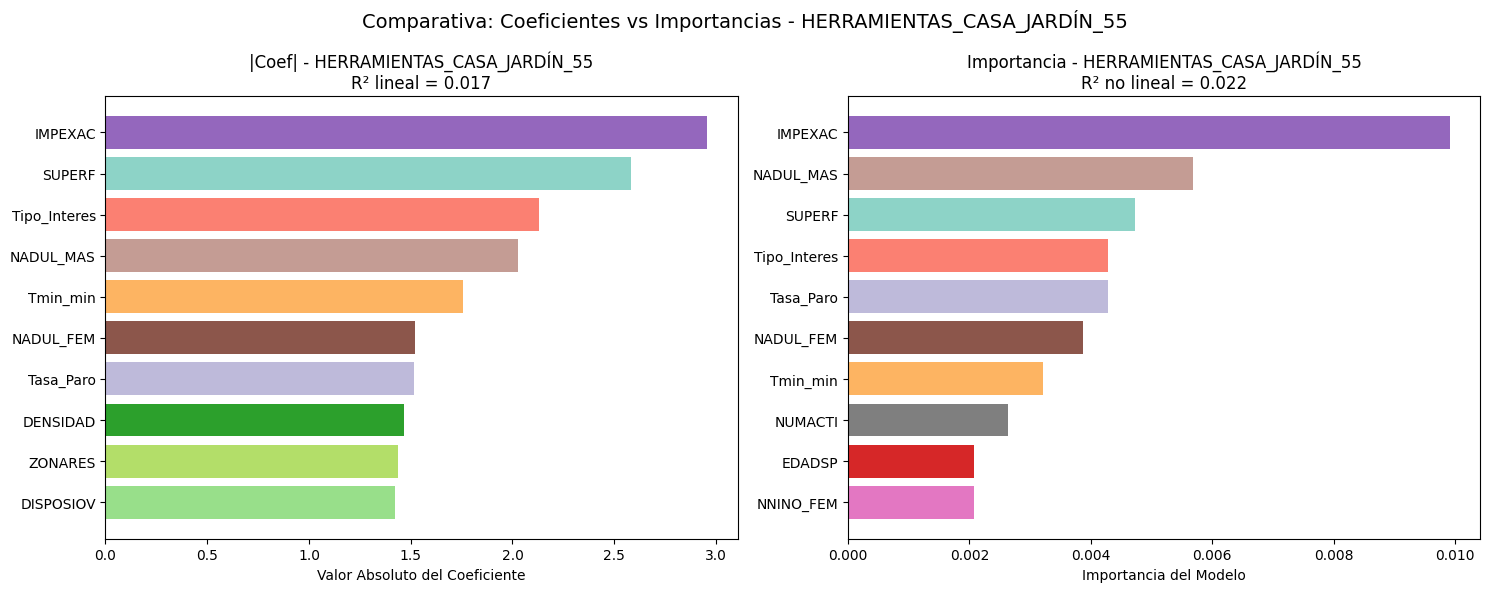

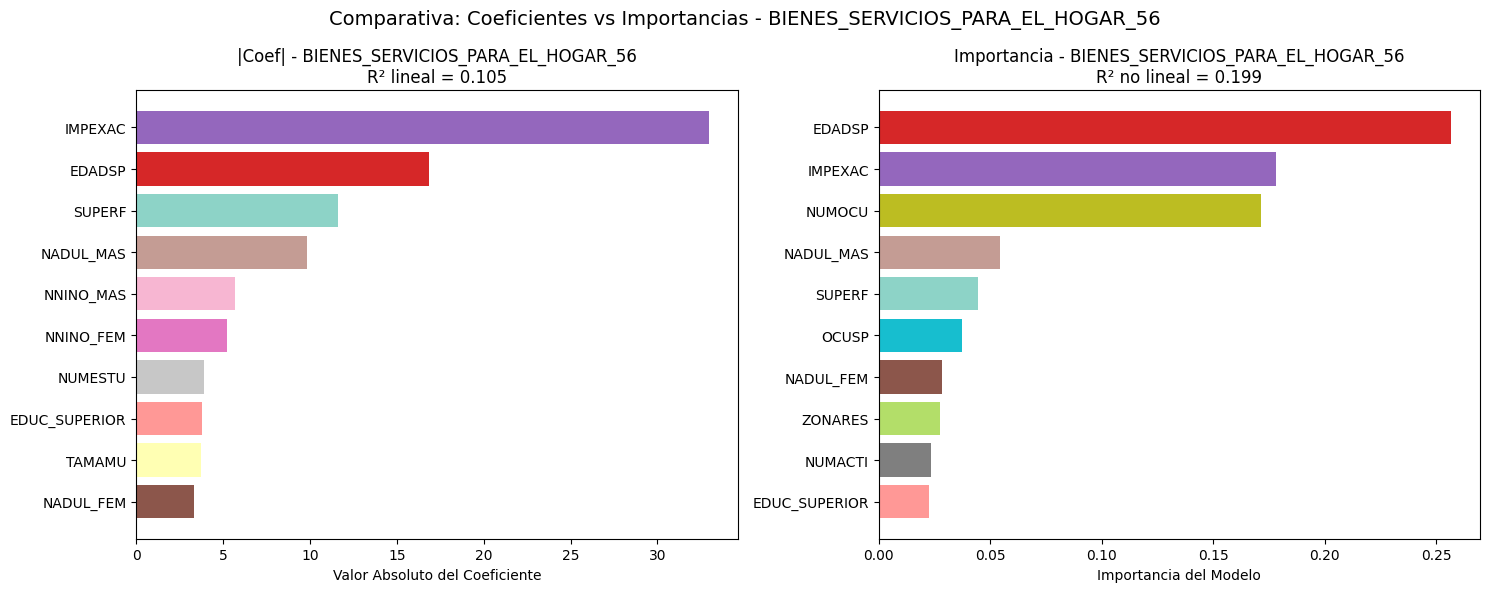

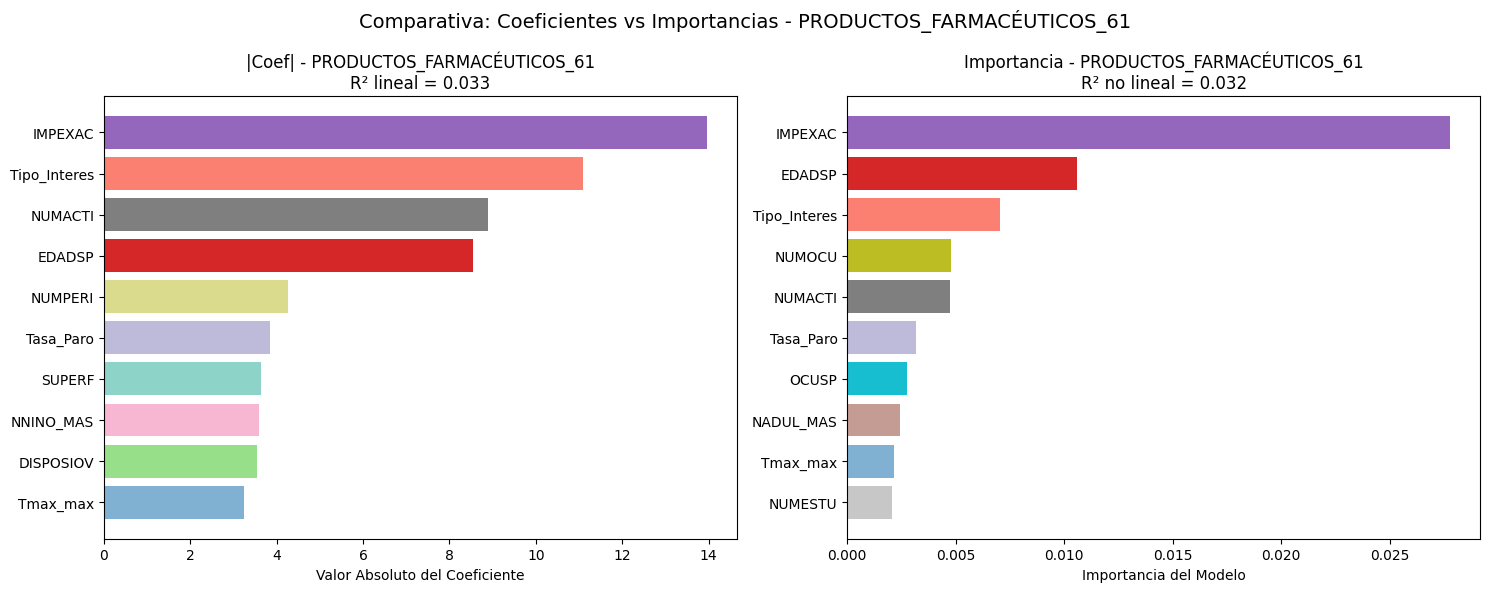

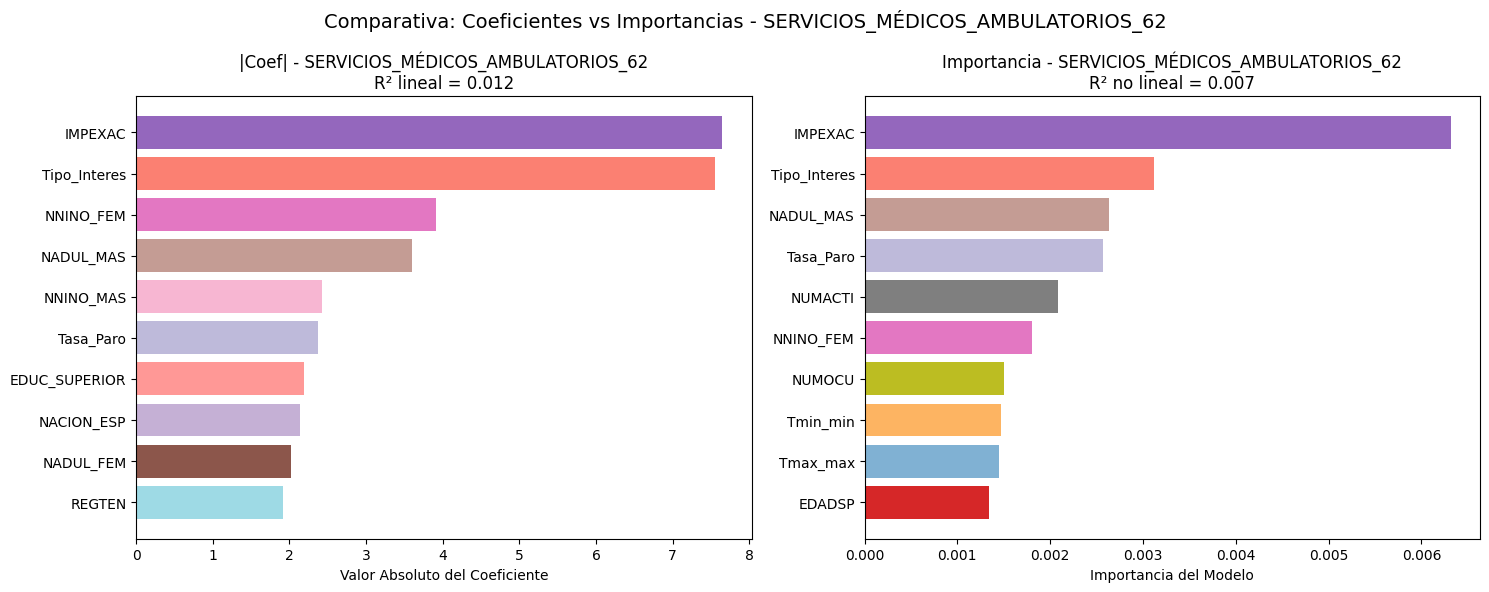

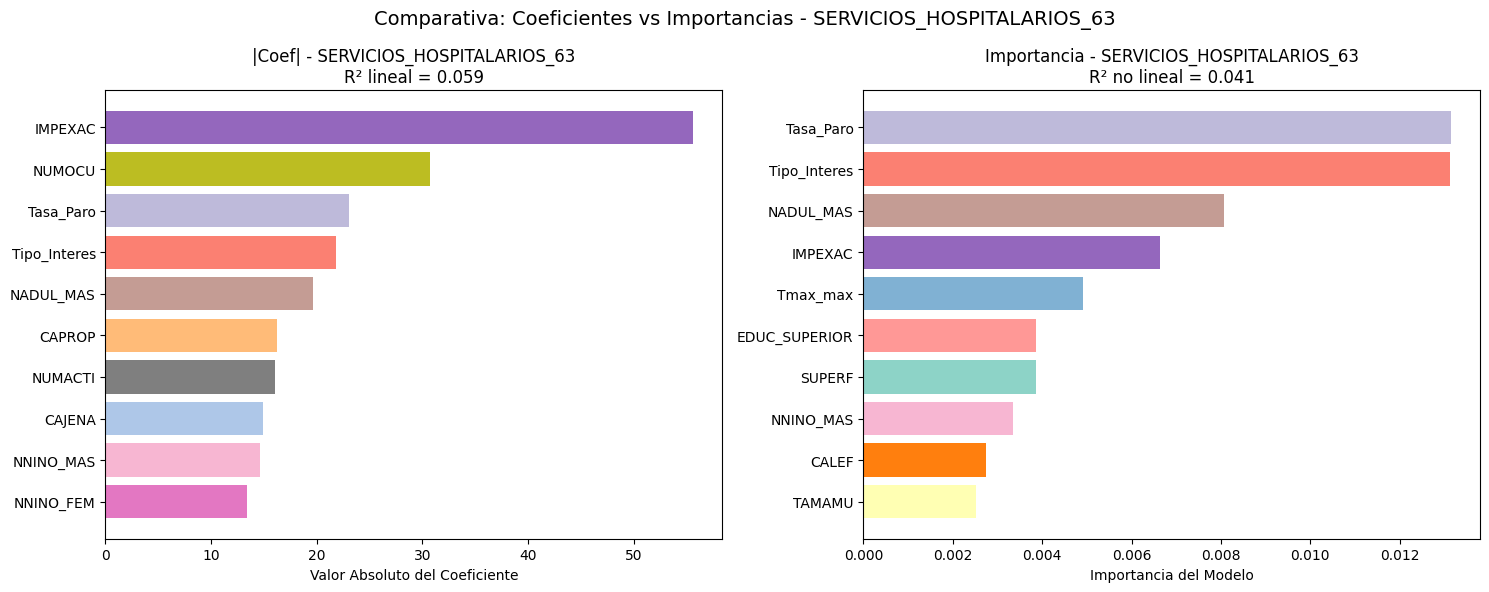

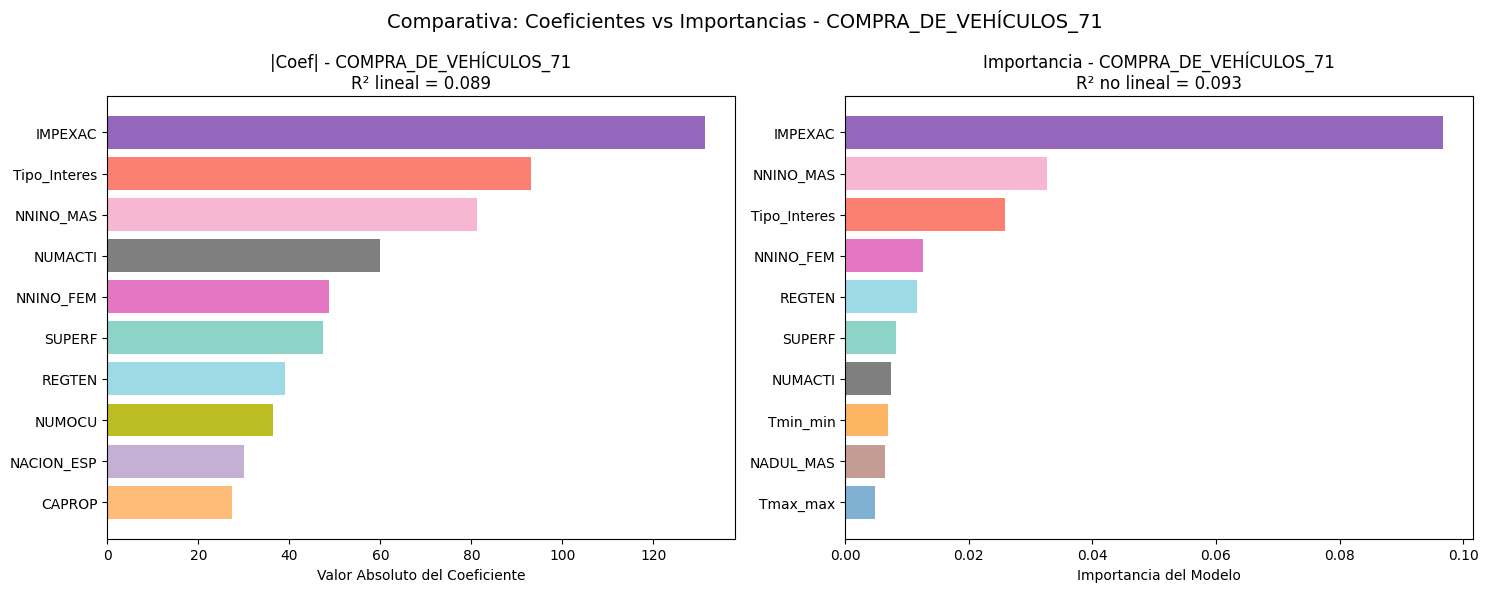

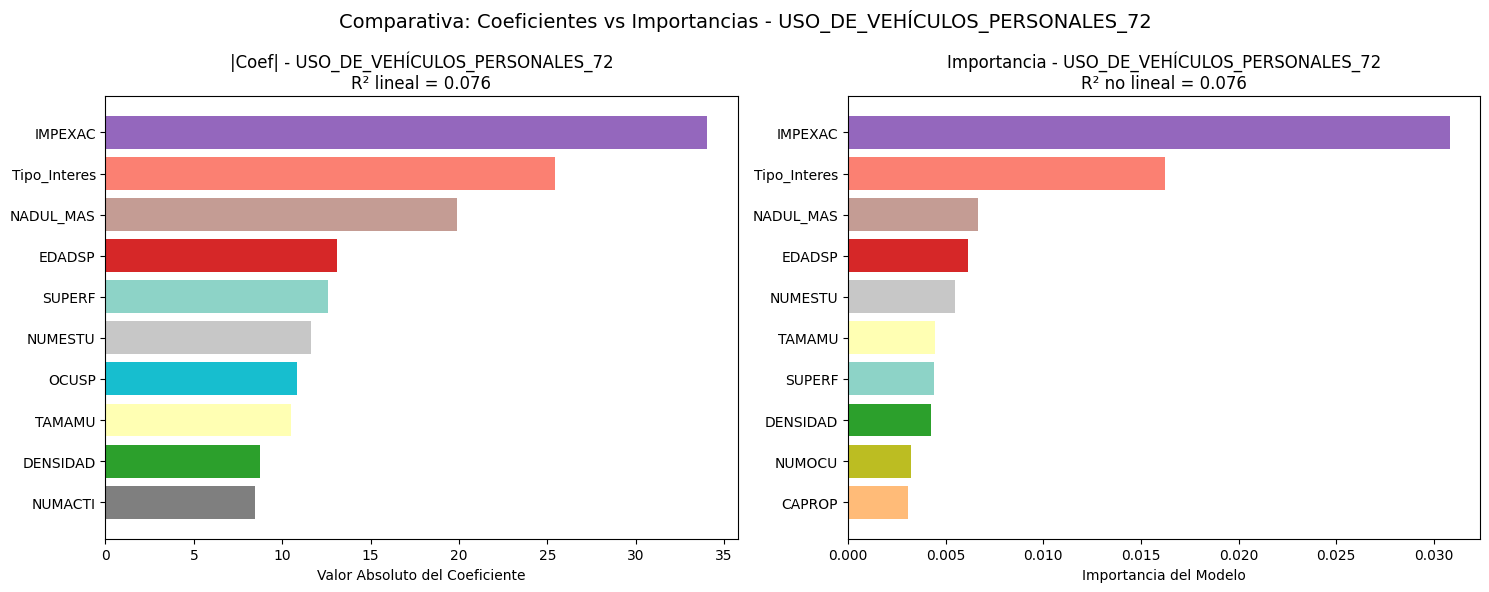

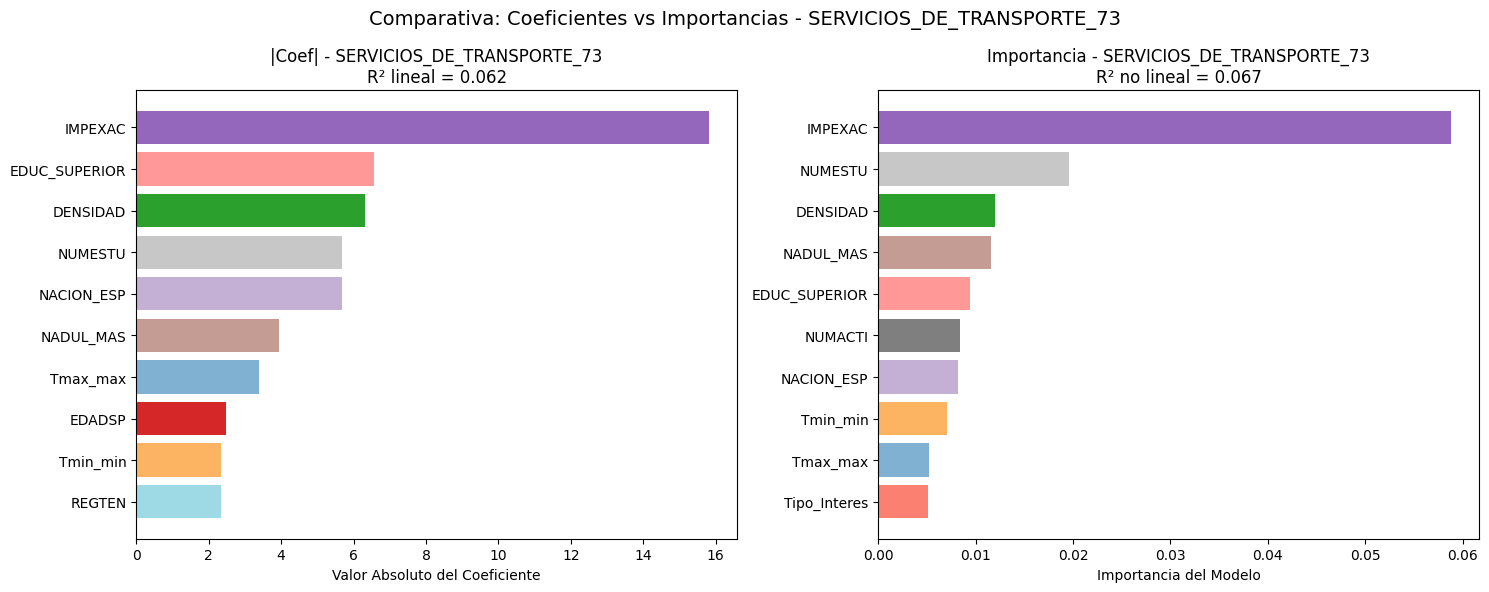

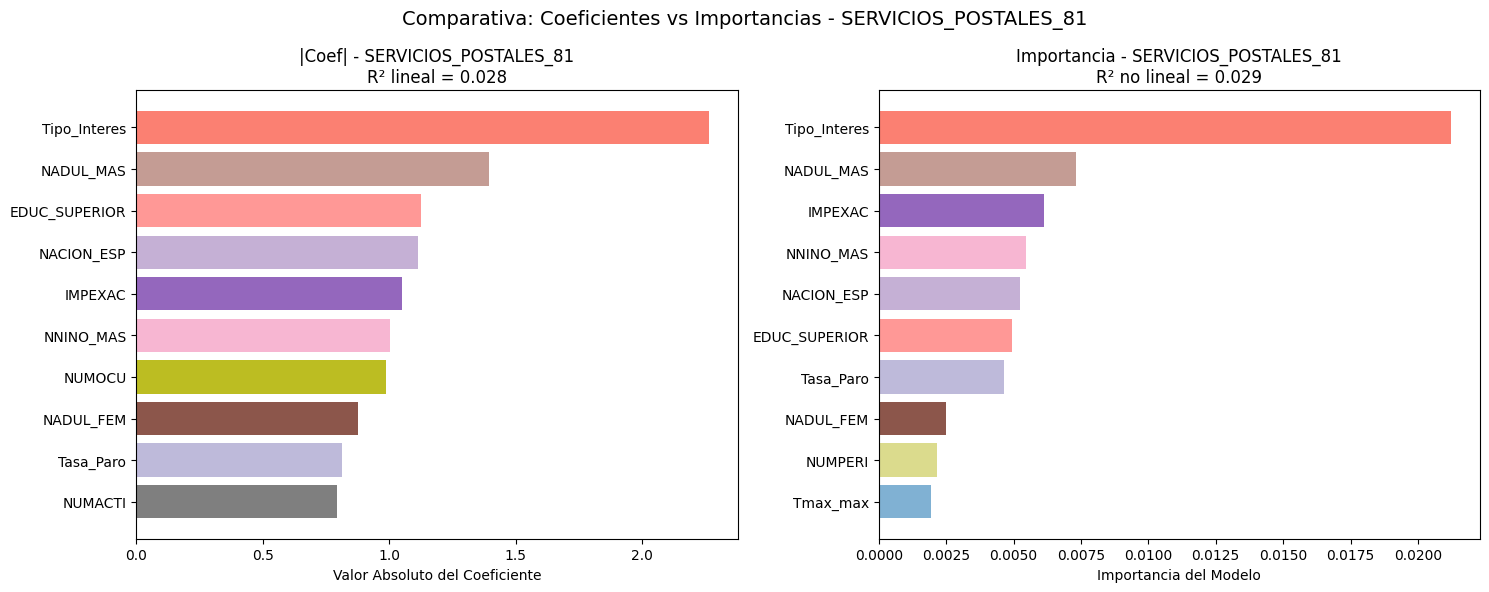

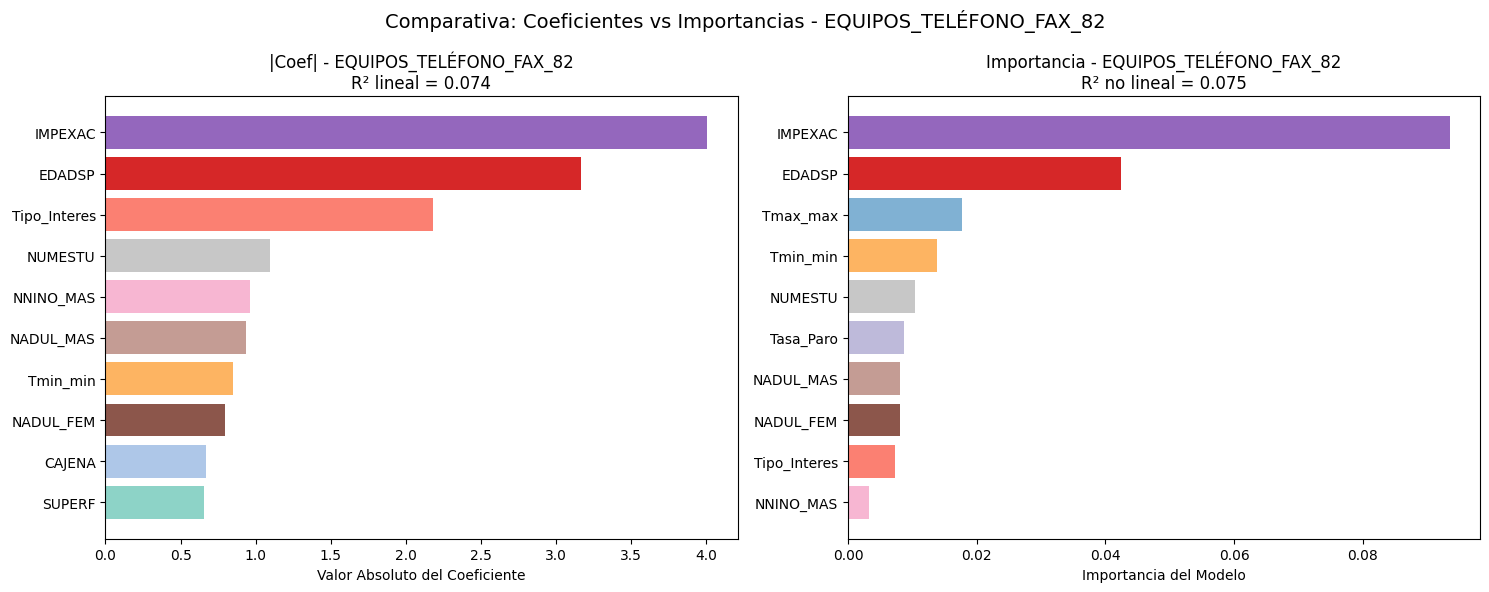

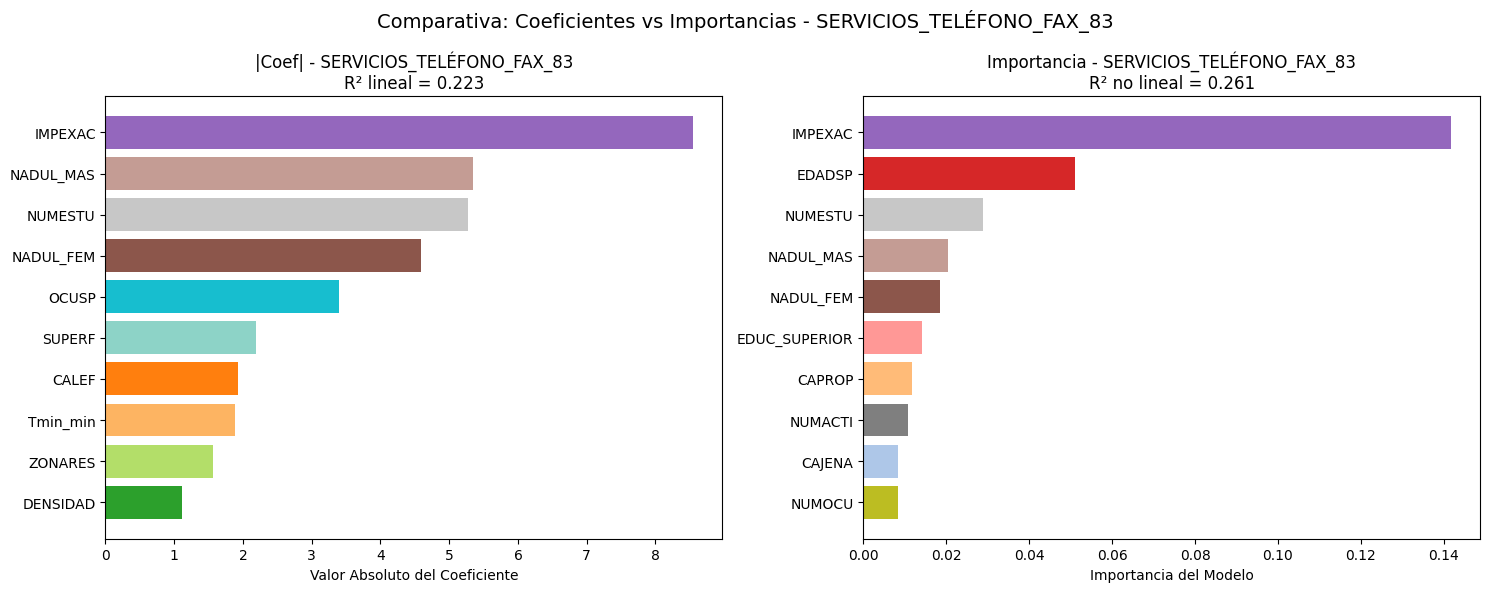

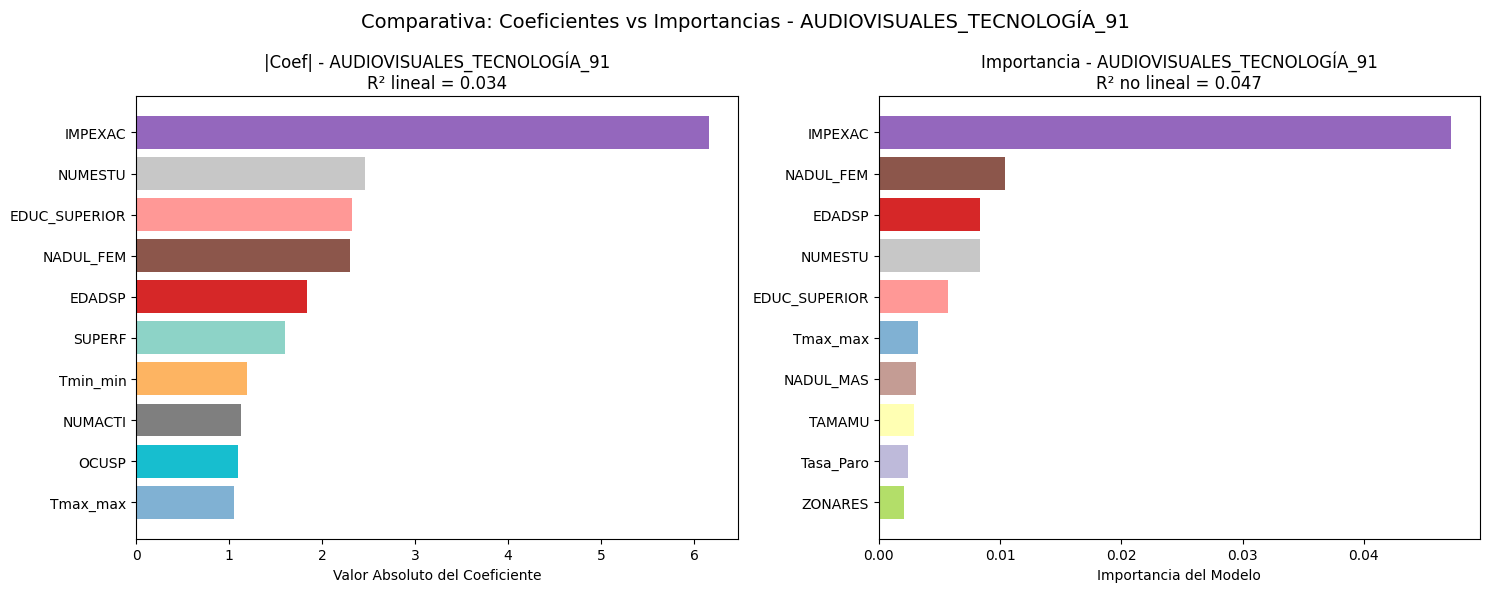

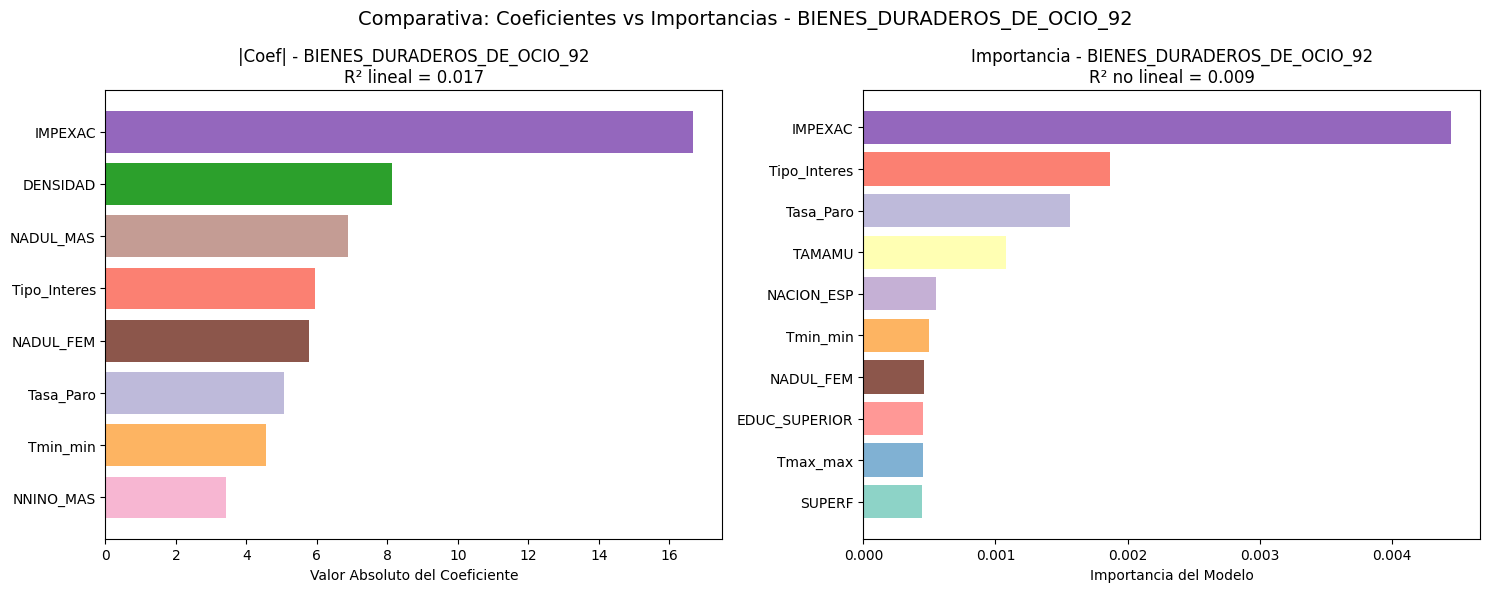

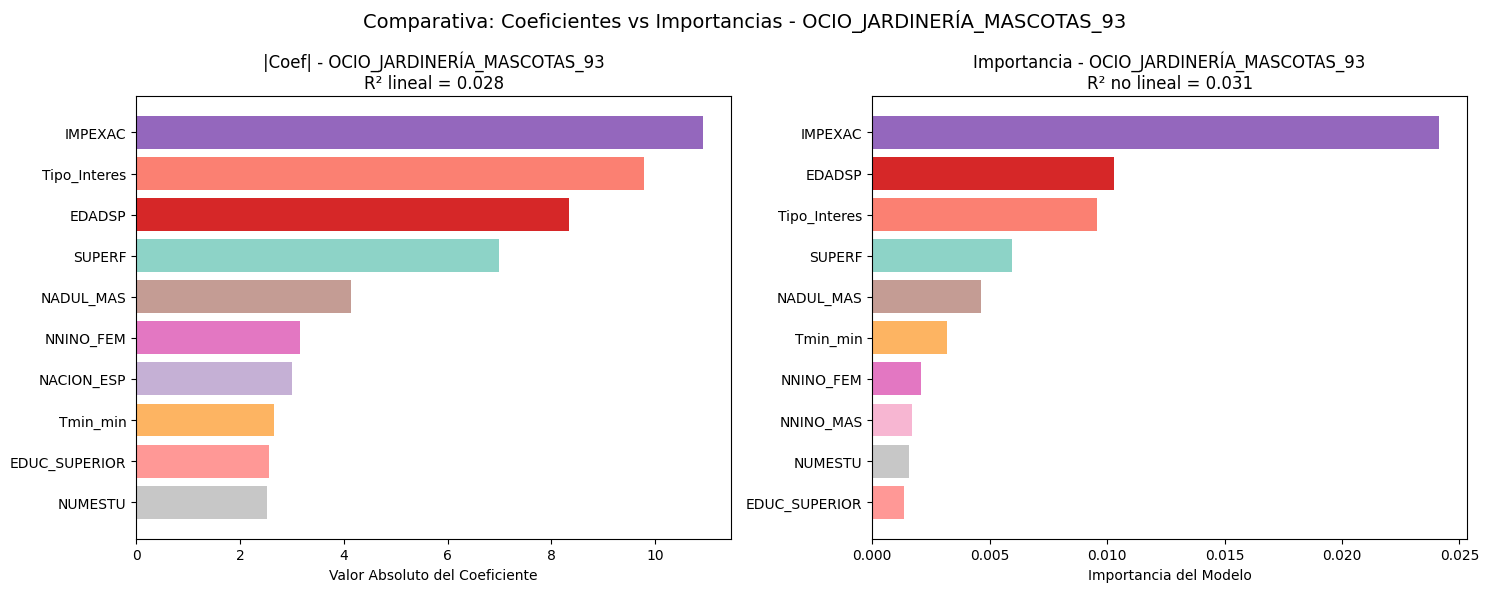

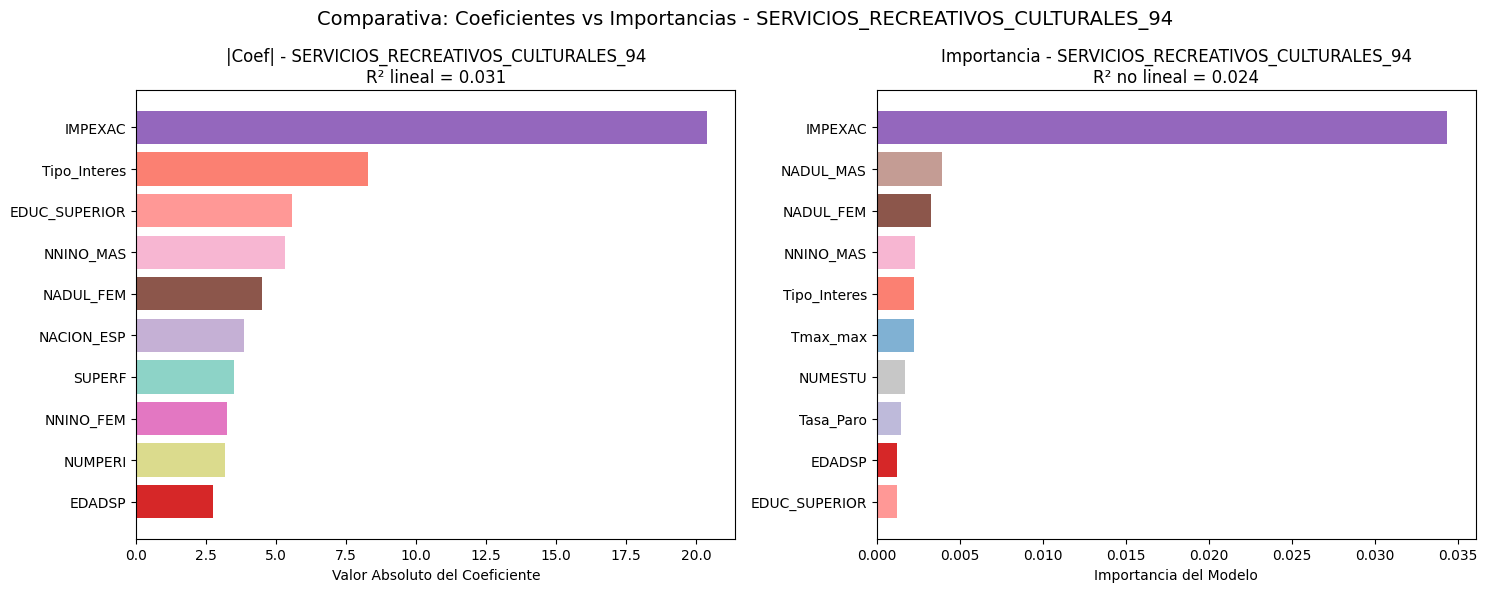

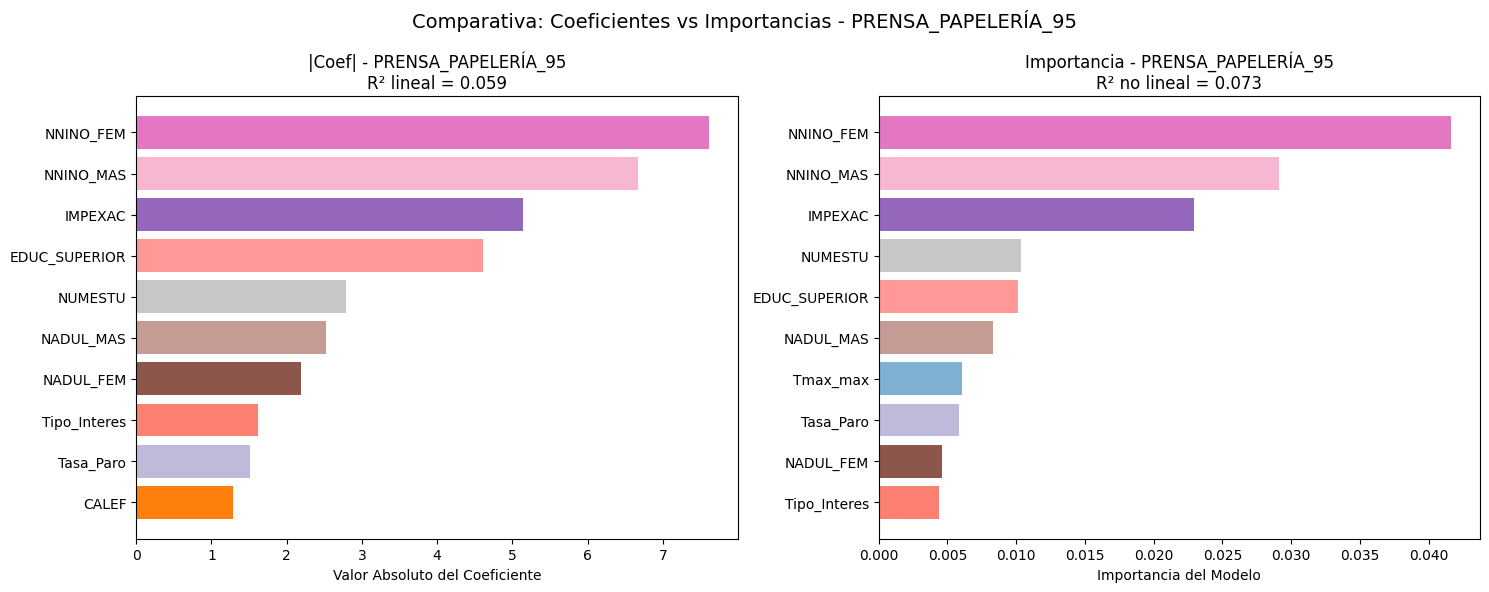

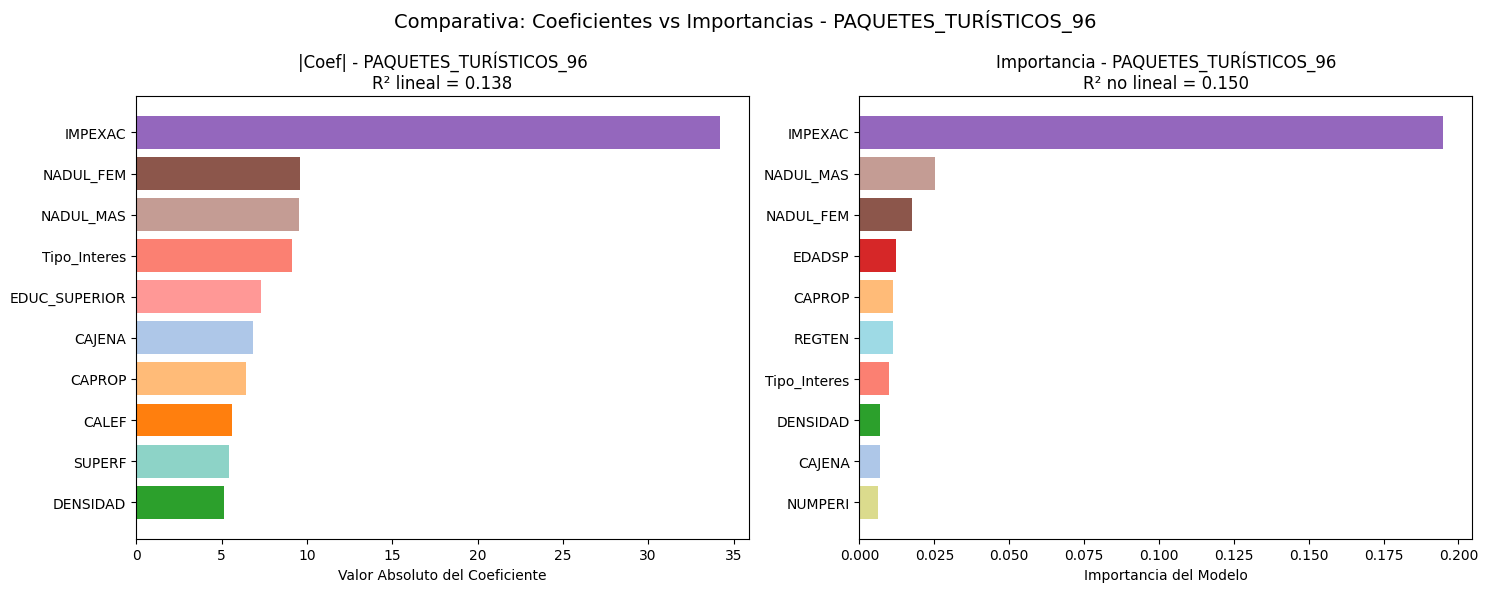

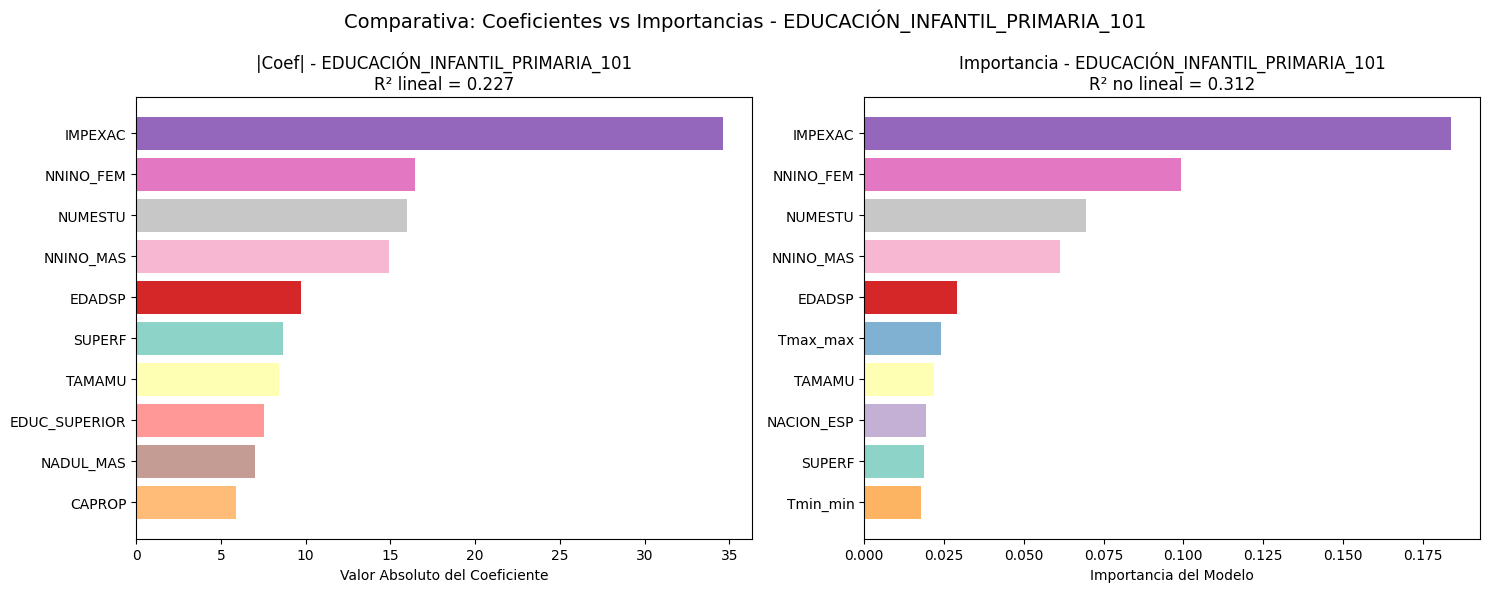

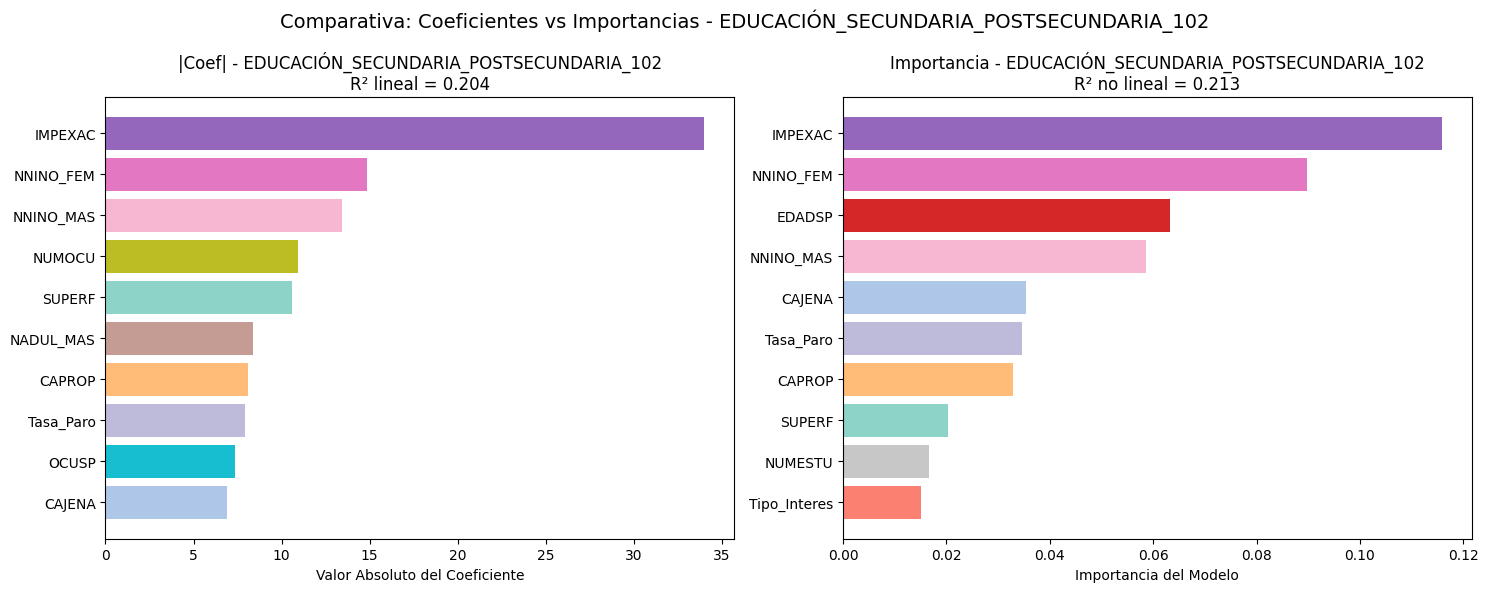

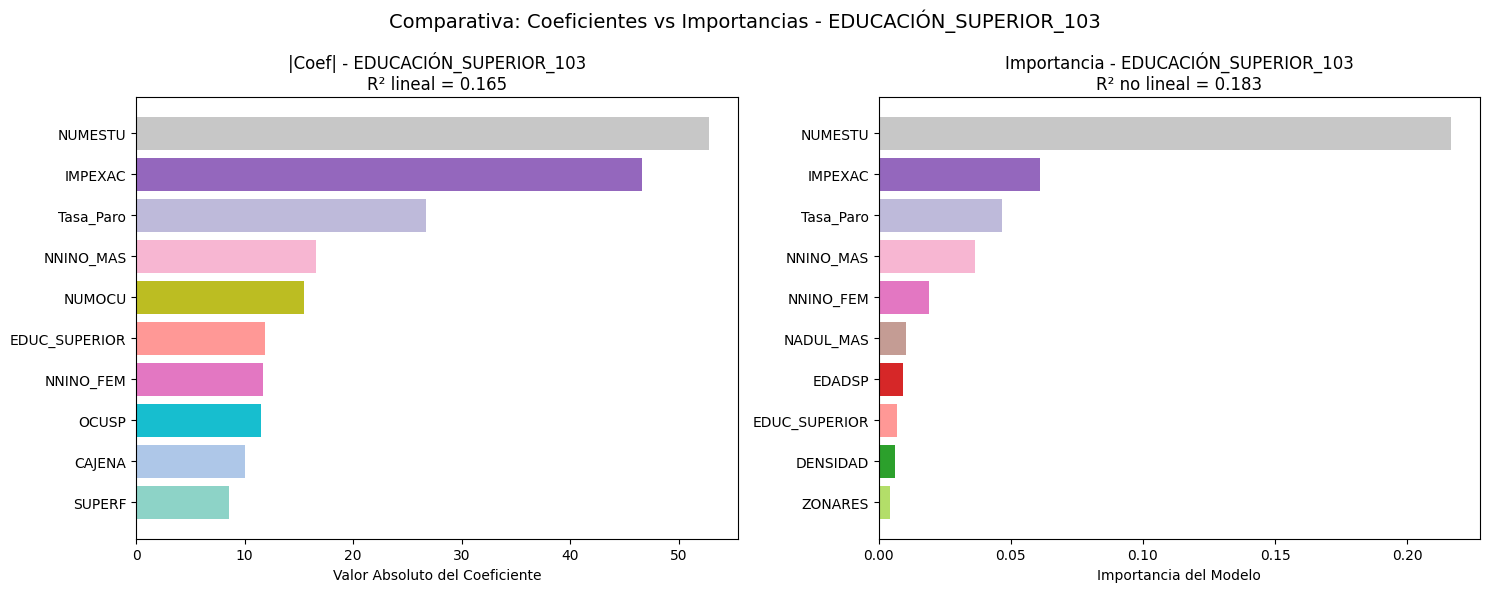

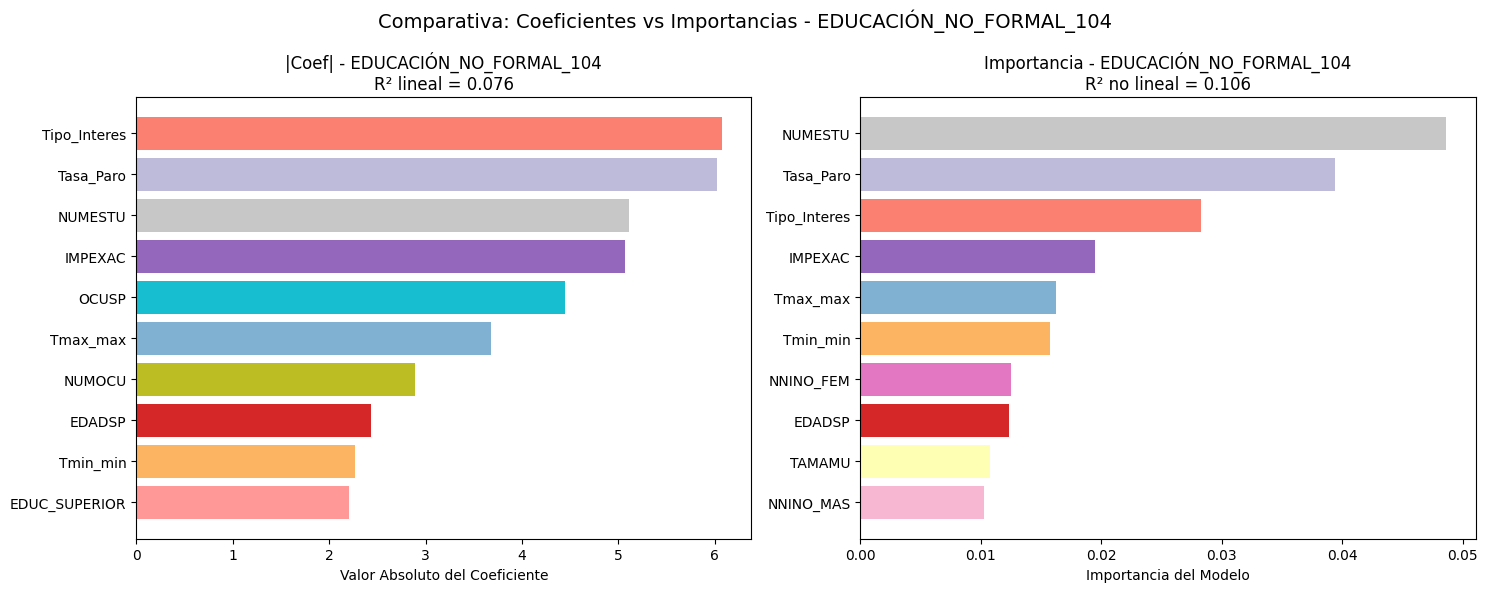

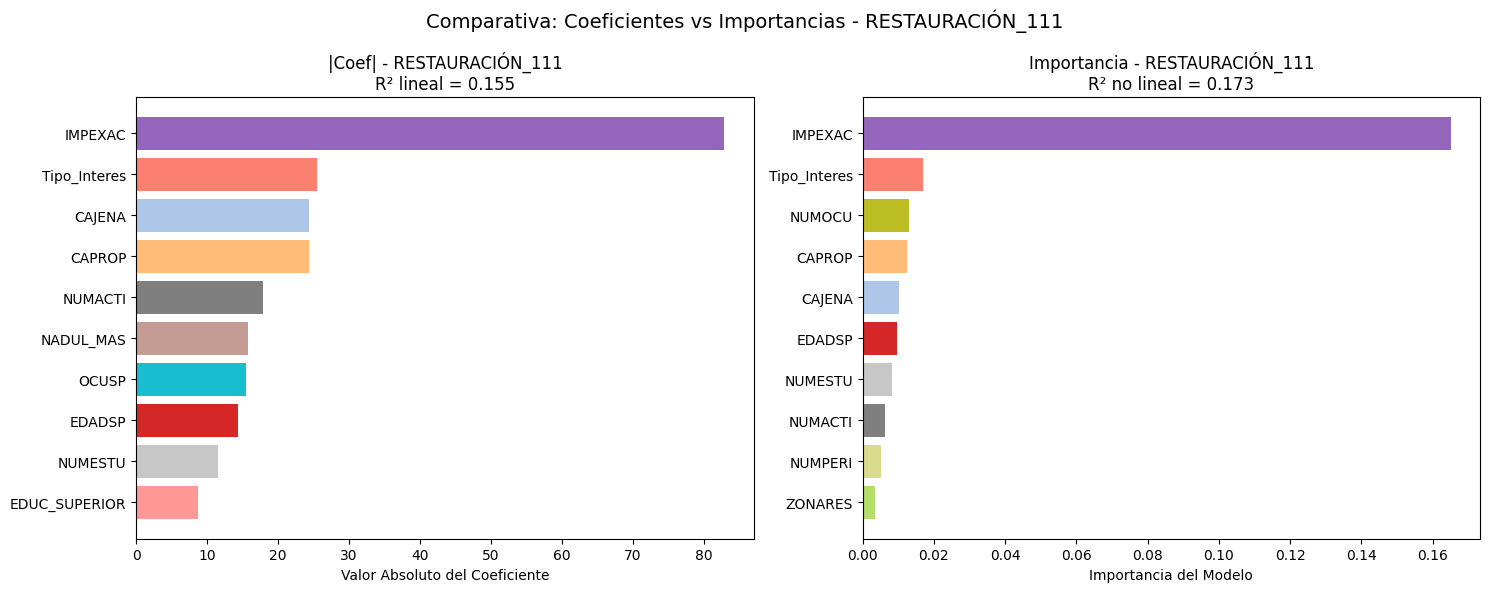

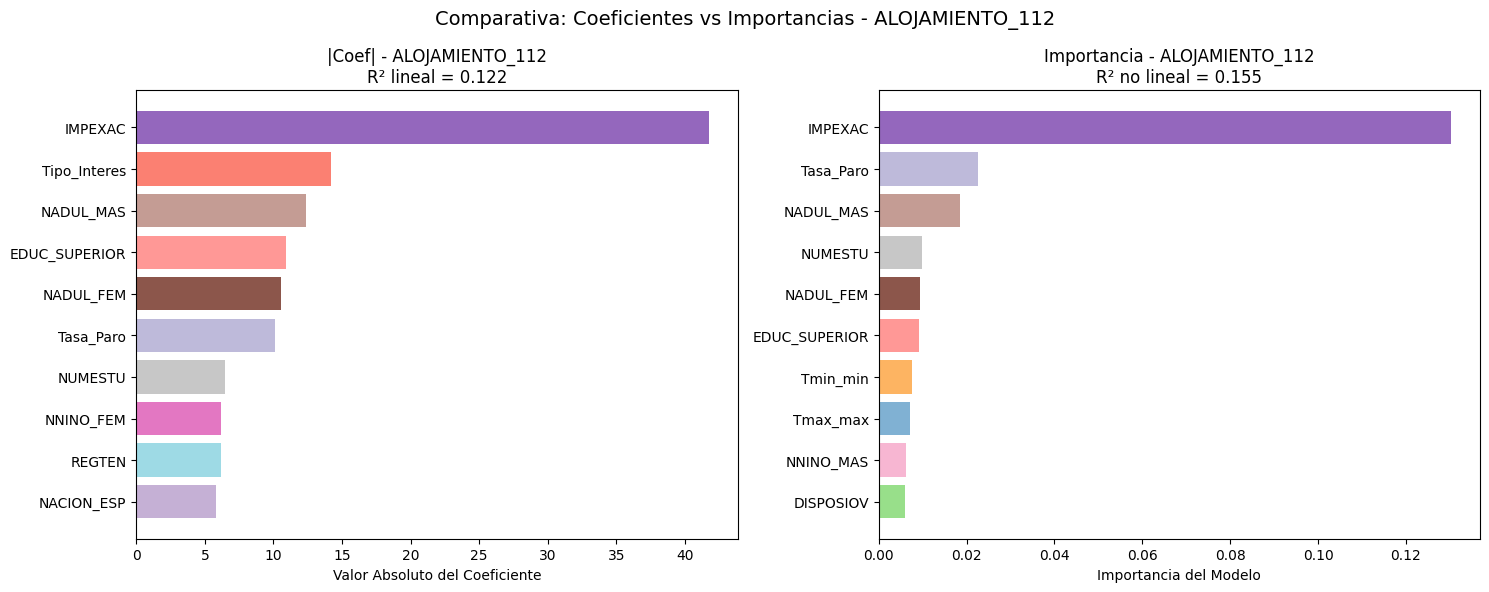

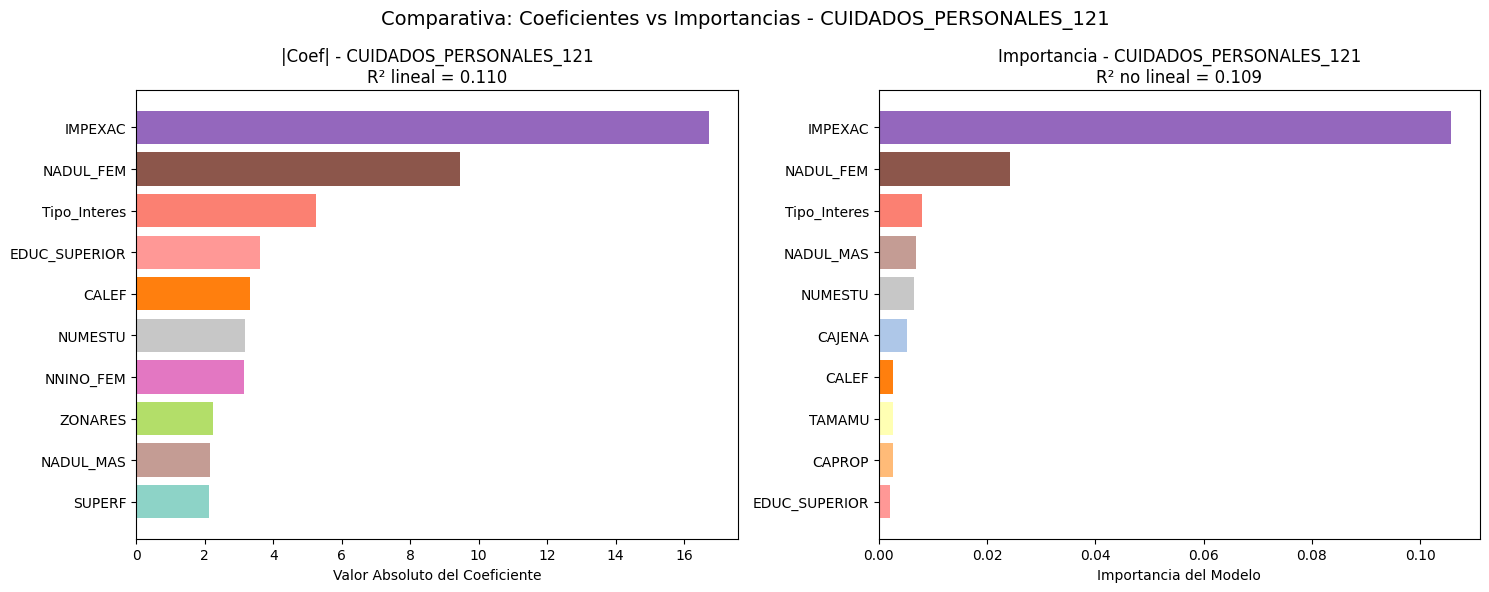

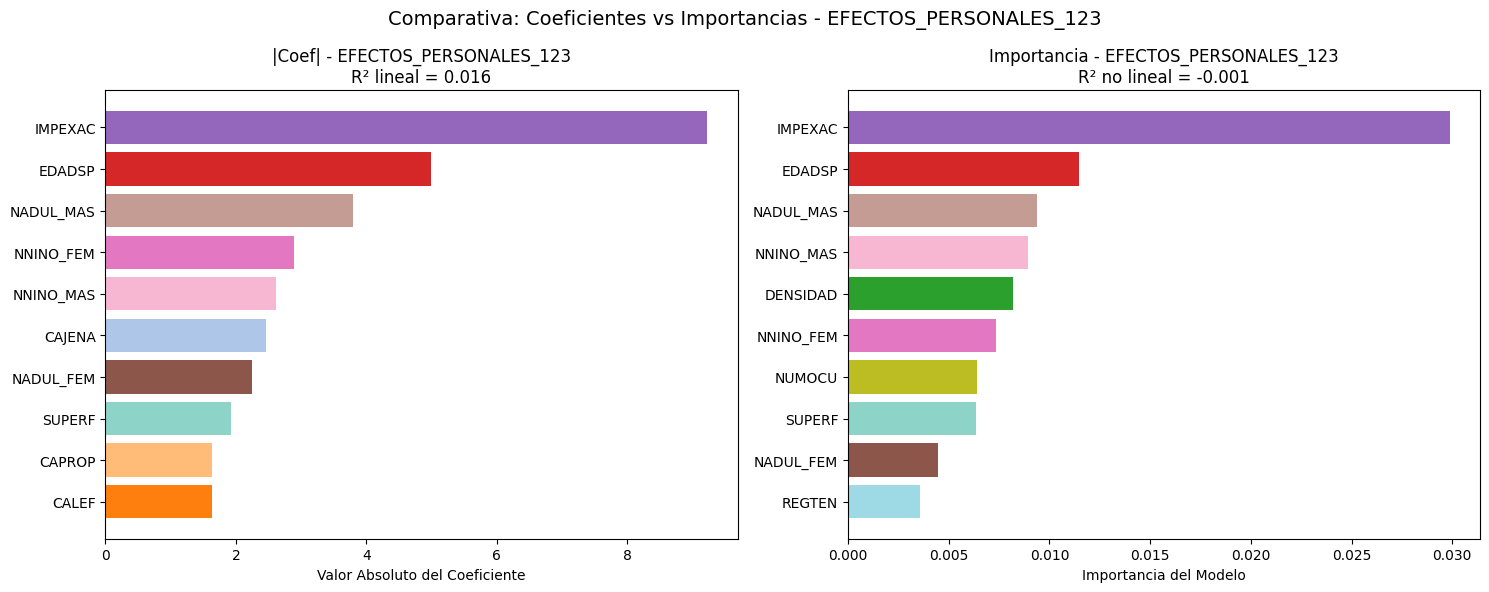

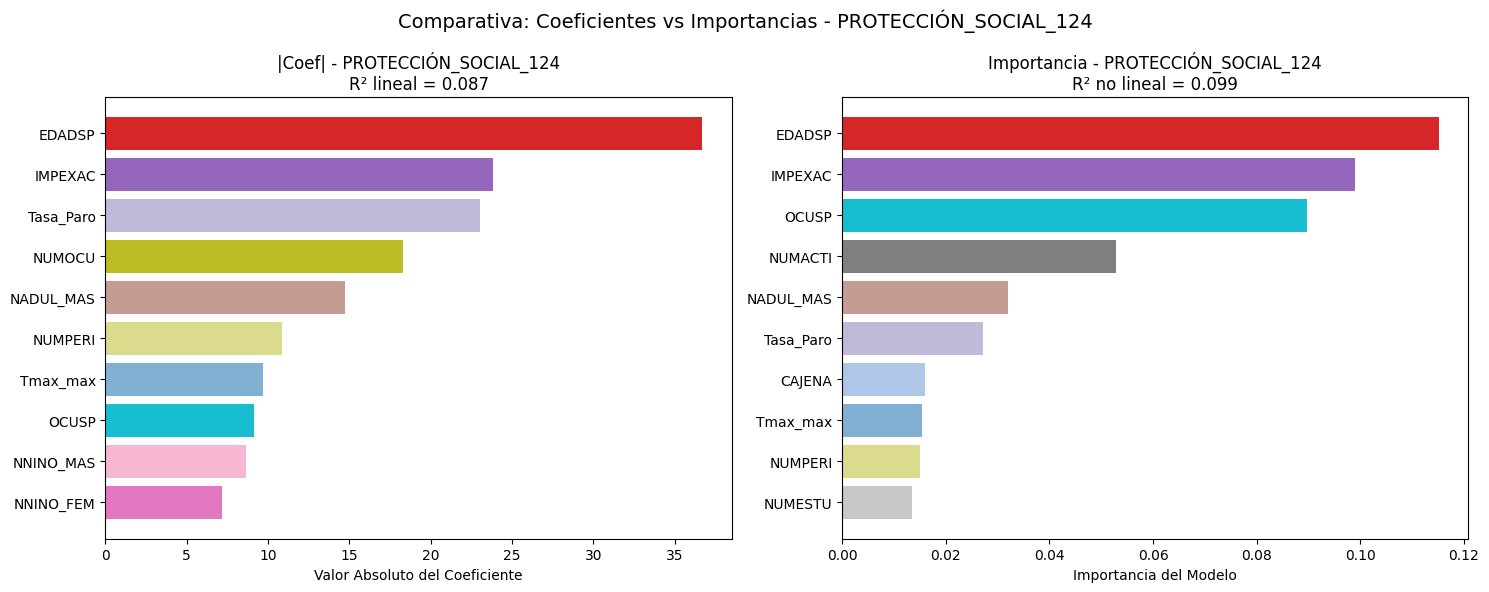

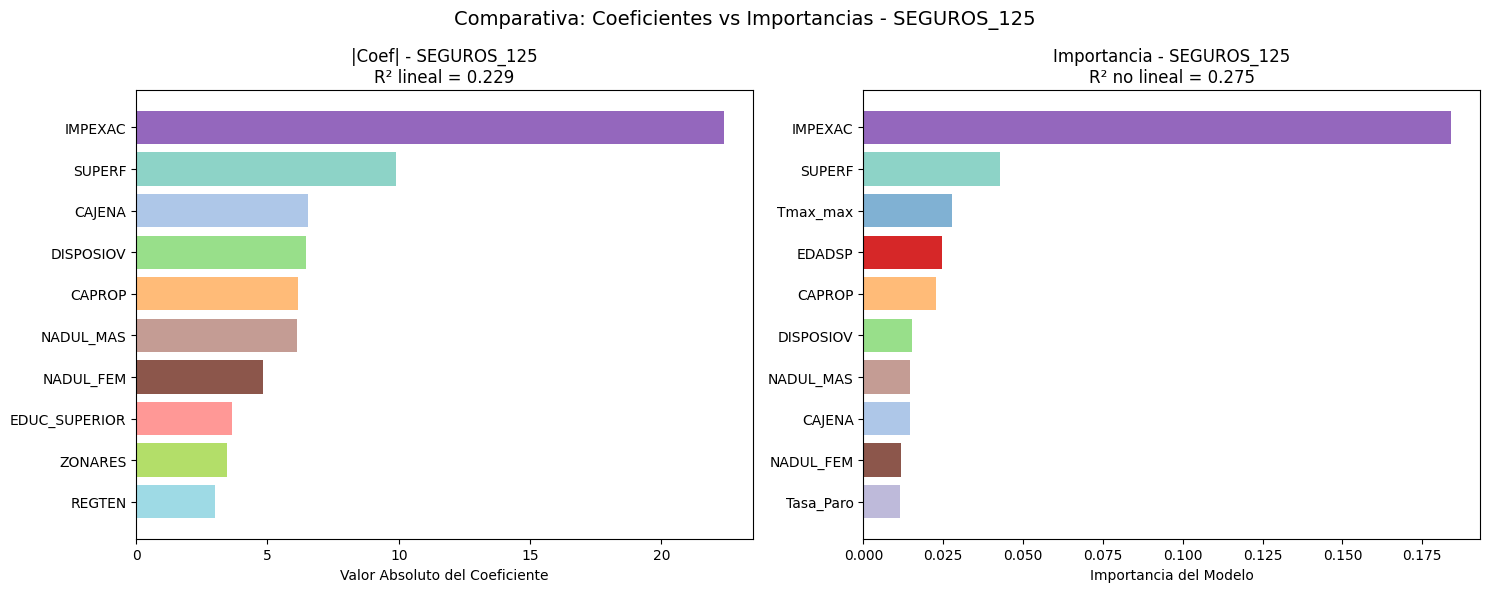

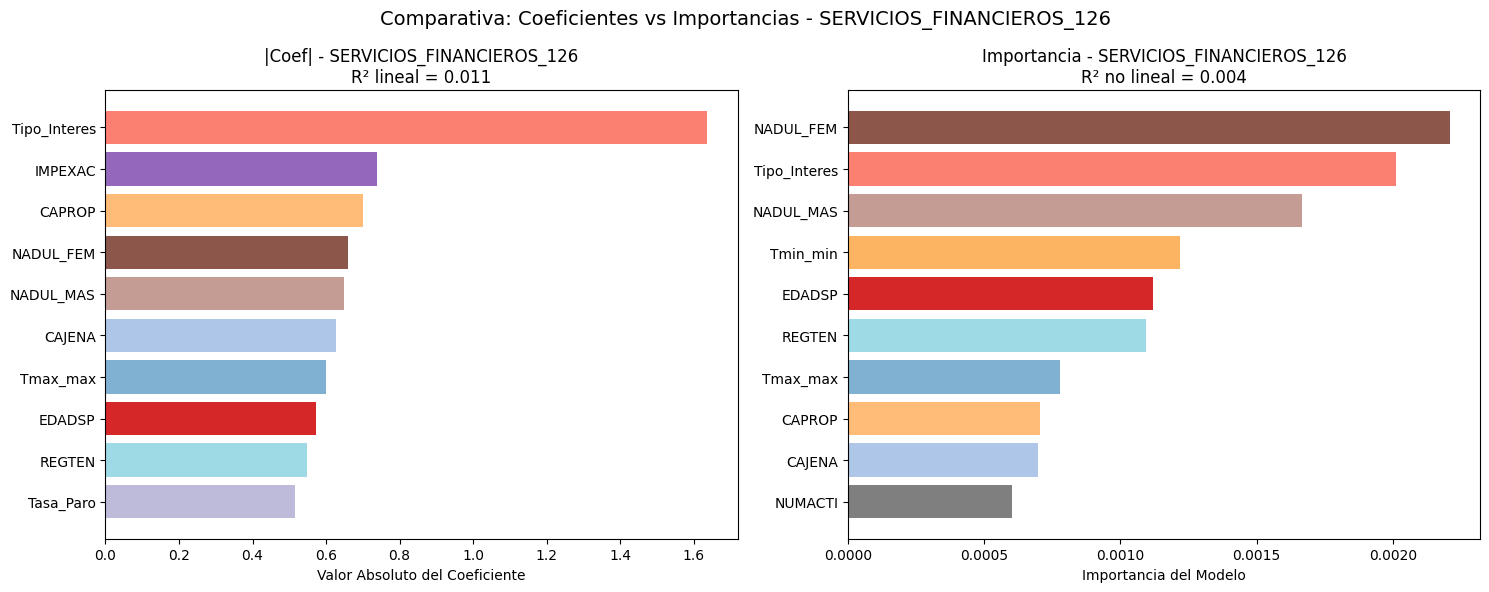

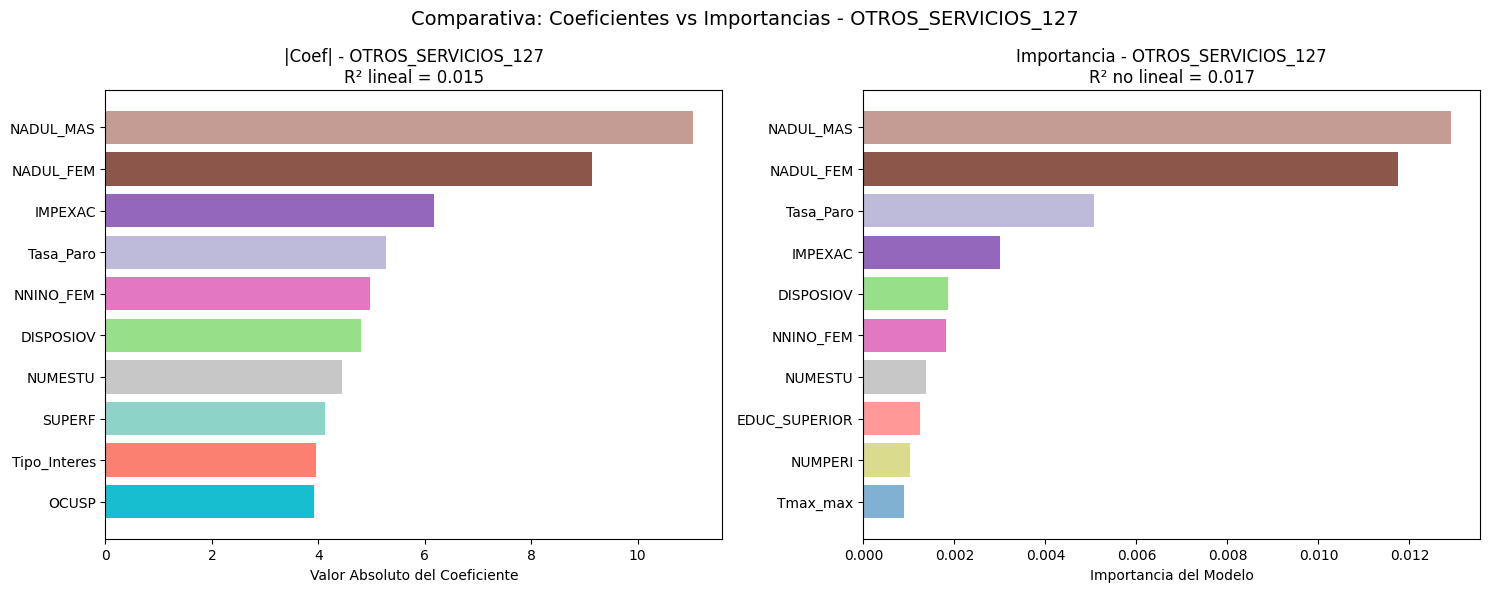

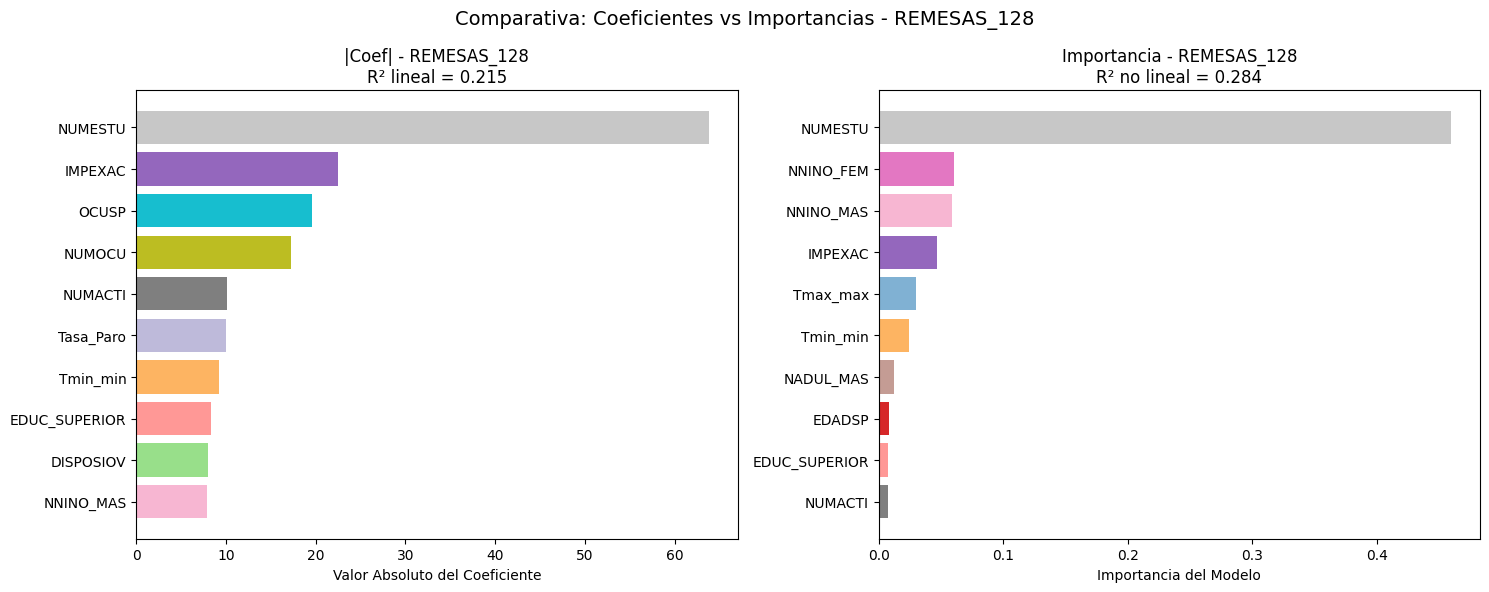

In [10]:
comparar_coeficientes_e_importancias_con_r2(
    lineal_coefs_df,
    nonlineal_importances_df,
    metrics_lineal_df,
    metrics_nonlineal_df
)